In [44]:
import matplotlib.pyplot as plt
%matplotlib inline
from DatasetAPPM import DatasetAPPM
from Nets import TheNet
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import sys
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import scikitplot as skplt
import seaborn as sns
import pandas as pd

In [45]:
def class_to_id(classes):

  class_id = {'ALA' : 0, 'ARG' : 1, 'ASN' : 2, 'ASP' : 3, 'CYS' : 4, 'GLU' : 5,
         'GLN' : 6, 'GLY' : 7, 'HIS' : 8, 'ILE' : 9, 'LEU' : 10, 'LYS' : 11,
         'MET' : 12, 'PHE' : 13, 'PRO' : 14, 'SER' : 15, 'THR' : 16, 'TRP' : 17, 'TYR' : 18,
         'VAL' : 19}

  for i in range(0,len(classes)):
    classes[i] = class_id[classes[i]]

  return classes
        
def id_to_class(ids):

  id_class = {0 : 'ALA', 1 : 'ARG', 2 : 'ASN', 3 : 'ASP', 4 : 'CYS', 5 : 'GLU',
          6 : 'GLN', 7 : 'GLY', 8 : 'HIS', 9 : 'ILE', 10 : 'LEU', 11 : 'LYS',
          12 : 'MET', 13 : 'PHE', 14 : 'PRO', 15 : 'SER', 16 : 'THR', 17 : 'TRP', 18 : 'TYR',
          19 : 'VAL'}

  for i in range(0,len(ids)):
    ids[i] = id_class[ids[i]]

  return ids

In [71]:
classes = ['ALA','ARG','ASN','ASP','CYS','GLU','GLN','GLY','HIS','ILE','LEU','LYS','MET','PHE','PRO','SER','THR','TRP','TYR','VAL']

testset_path = '/home/paulo/Documents/BD/10%_top8000_50hom_discretized_full_train60_20_20/test/'
weights_path = '/home/paulo/Documents/TCC/experiments/TheNet-arch1/TheNet-drop=0,8-db=unbalanced10%-batch=256-Adam-lr=0,0001-epcs=200/'

cuda:0
Loading trainset...
Validationset loaded.
Neural network evaluation mode activated!!!
Labels:  tensor([ 7, 16,  5, 11,  1,  6,  5,  7,  2, 17, 18,  2,  9,  1, 16,  7, 13,  6,
         0,  3, 19, 14, 10,  1,  3,  7, 16, 11, 11, 19, 12, 14,  0, 18,  7,  6,
         0,  2,  7, 15, 16,  9,  3,  1, 16,  5, 15, 15, 14, 11,  8, 11,  3, 11,
         7,  3, 16, 10, 18,  6, 15,  6,  2,  6, 15,  5,  7, 17,  0,  9, 11,  0,
        19,  1,  1,  5, 14, 19, 19,  4,  7, 16, 19,  5,  2,  2, 13, 14,  9, 10,
         9, 14, 11,  5,  9,  7, 15, 14, 14, 14,  3, 15, 15,  9,  0,  9,  2, 10,
        17,  3,  0, 12,  9,  1, 15,  2, 19,  7,  3, 13,  5, 11, 10,  1,  2,  7,
         5,  2,  9,  8,  9, 10,  9,  0, 10, 10,  6, 14, 15,  3,  2, 19, 19,  7,
         2,  2,  5, 18, 13, 19, 19,  5,  8, 12,  7, 10, 18, 18, 14,  1,  7,  5,
         7,  0,  3, 14,  1,  3,  1, 13, 10, 11,  0, 19, 18, 19, 14,  7, 14,  9,
         1,  1,  4,  0, 19,  5, 15, 18,  3,  8,  9, 15,  0,  1,  3,  1,  3, 14,
         3, 11,  7

tensor([[ 1.1839e+00, -1.7993e-01,  1.2364e+00,  5.7813e-01, -5.8520e+00,
          3.7455e+00,  2.9779e+00, -2.6744e+00, -2.6218e+00, -9.3710e+00,
         -6.3810e+00,  1.1774e+00, -7.6406e+00, -4.0822e+00,  4.2811e+00,
          1.5268e+00,  6.5968e-01, -4.0274e+00, -2.4971e+00, -4.2378e+00],
        [-5.9612e+00, -8.3350e+00, -5.1469e+00, -9.2410e+00, -2.8691e+00,
         -2.6178e+00, -1.2987e+00, -6.8113e+00,  1.8691e+00,  1.3825e+01,
          1.3399e+01, -5.6481e+00,  8.6977e+00,  1.8668e+00, -2.3854e+01,
         -3.7999e+00,  7.7963e-01,  4.9895e-01, -2.7973e+00,  8.8166e+00],
        [ 3.1100e+00, -7.1970e+00, -1.2026e+00, -2.1585e+00,  5.0589e-01,
         -1.9181e+00,  2.0379e+00, -1.3465e+01,  7.1404e-01,  2.0756e+00,
         -3.3441e+00, -6.4171e+00, -2.0862e+00, -3.6789e+00, -9.5738e+00,
         -5.5408e+00,  1.8380e+00, -1.5776e+01, -9.1258e+00,  2.1364e+00],
        [ 4.0602e+00, -7.8344e-01, -4.3761e-01,  7.6981e-01, -3.1169e+00,
         -1.5611e+00, -1.2279e+00, 

Labels:  tensor([ 3, 11, 16, 19, 16,  0, 11,  3,  5,  2,  2, 13,  5,  5, 16, 18, 12,  9,
        10,  3, 13,  3, 15,  5, 13, 19, 14, 19,  9,  5, 18,  1, 10, 15,  6, 18,
         8, 18, 10, 15,  9,  7,  3,  9,  5,  7, 12,  4,  5, 16, 16, 15,  3, 11,
         0,  3,  9, 18, 14,  2,  0, 16, 11, 16, 17,  0,  7,  5, 11,  9, 10, 18,
         5,  0,  0, 19,  7, 15,  1, 14,  2, 10, 13,  5, 16,  5,  5,  5, 15, 19,
        15, 15, 11, 11, 18, 15,  8,  4,  5,  2,  2,  2, 19, 10, 19,  0,  7,  3,
         6, 17, 15,  0,  7,  1,  2, 19, 17, 13, 17, 17,  6,  9, 13,  9,  1,  2,
        16,  2, 16, 17,  7,  6, 10, 18,  2,  0, 18, 15,  0, 17,  2, 10, 14,  3,
        10, 14, 11, 17,  1,  1, 17, 16, 17, 11,  1, 19, 15,  9, 16,  2, 13, 16,
        16,  9,  9, 18,  3, 10,  9, 10,  1, 13,  1,  2, 16,  7,  6, 10,  5, 10,
        15,  3,  7,  2,  0,  5,  5,  0, 18,  0, 12,  2,  0,  7,  1, 10, 17, 10,
         8, 19,  2, 18,  7, 11,  7,  3,  9,  1,  0,  7,  0, 19, 15,  1,  0,  5,
         2,  9,  9, 11, 15,  3,

tensor([[ 1.1839e+00, -1.7993e-01,  1.2364e+00,  5.7813e-01, -5.8520e+00,
          3.7455e+00,  2.9779e+00, -2.6744e+00, -2.6218e+00, -9.3710e+00,
         -6.3810e+00,  1.1774e+00, -7.6406e+00, -4.0822e+00,  4.2811e+00,
          1.5268e+00,  6.5968e-01, -4.0274e+00, -2.4971e+00, -4.2378e+00],
        [-5.9612e+00, -8.3350e+00, -5.1469e+00, -9.2410e+00, -2.8691e+00,
         -2.6178e+00, -1.2987e+00, -6.8113e+00,  1.8691e+00,  1.3825e+01,
          1.3399e+01, -5.6481e+00,  8.6977e+00,  1.8668e+00, -2.3854e+01,
         -3.7999e+00,  7.7963e-01,  4.9895e-01, -2.7973e+00,  8.8166e+00],
        [ 3.1100e+00, -7.1970e+00, -1.2026e+00, -2.1585e+00,  5.0589e-01,
         -1.9181e+00,  2.0379e+00, -1.3465e+01,  7.1404e-01,  2.0756e+00,
         -3.3441e+00, -6.4171e+00, -2.0862e+00, -3.6789e+00, -9.5738e+00,
         -5.5408e+00,  1.8380e+00, -1.5776e+01, -9.1258e+00,  2.1364e+00],
        [ 4.0602e+00, -7.8344e-01, -4.3761e-01,  7.6981e-01, -3.1169e+00,
         -1.5611e+00, -1.2279e+00, 

Labels:  tensor([10, 14, 18,  9, 13, 10,  9,  0,  0,  0,  6,  2, 15,  3,  8,  7,  9, 19,
         2,  9,  0,  7,  0,  0, 10,  7, 14, 14,  7, 14,  0,  6, 15,  0, 15,  0,
         9, 13, 15, 12, 10,  0, 19, 19,  3,  7,  8,  2,  8, 10, 19, 16, 14, 14,
        10, 19,  7,  7, 19,  2, 10,  2,  9, 16, 18,  0,  3,  3, 19, 19, 15, 19,
         9,  3, 19,  9, 13, 16,  5,  3, 14,  3, 12, 16, 10,  5,  2, 18, 15,  4,
        10, 10, 18, 19,  2,  2, 16,  7,  9,  3, 16, 19,  3,  0,  3, 14, 13,  6,
        15,  7, 15,  7, 15, 15,  8,  1,  2,  1,  0, 19,  3,  6,  8, 17, 13,  8,
        14,  1, 10, 12,  5,  6,  1,  1,  0, 17, 19,  7, 11,  7, 13, 11,  3, 15,
         0,  3, 15,  7, 14, 14,  0,  0, 19, 16, 14,  1,  6,  0,  6,  2,  5,  3,
        15, 12,  1, 19,  9, 10,  1,  0,  6, 10, 18,  7, 10, 14, 19, 14,  7, 14,
         6,  2, 14, 13, 14,  3,  9, 13, 17, 10, 16, 10,  7,  0,  6, 11,  3,  2,
        11, 12,  7, 10,  6,  2,  5,  0,  3, 14, 18,  9, 15,  8,  5, 13, 10, 18,
         1,  3, 10, 14,  5, 13,

tensor([[ 1.1839e+00, -1.7993e-01,  1.2364e+00,  5.7813e-01, -5.8520e+00,
          3.7455e+00,  2.9779e+00, -2.6744e+00, -2.6218e+00, -9.3710e+00,
         -6.3810e+00,  1.1774e+00, -7.6406e+00, -4.0822e+00,  4.2811e+00,
          1.5268e+00,  6.5968e-01, -4.0274e+00, -2.4971e+00, -4.2378e+00],
        [-5.9612e+00, -8.3350e+00, -5.1469e+00, -9.2410e+00, -2.8691e+00,
         -2.6178e+00, -1.2987e+00, -6.8113e+00,  1.8691e+00,  1.3825e+01,
          1.3399e+01, -5.6481e+00,  8.6977e+00,  1.8668e+00, -2.3854e+01,
         -3.7999e+00,  7.7963e-01,  4.9895e-01, -2.7973e+00,  8.8166e+00],
        [ 3.1100e+00, -7.1970e+00, -1.2026e+00, -2.1585e+00,  5.0589e-01,
         -1.9181e+00,  2.0379e+00, -1.3465e+01,  7.1404e-01,  2.0756e+00,
         -3.3441e+00, -6.4171e+00, -2.0862e+00, -3.6789e+00, -9.5738e+00,
         -5.5408e+00,  1.8380e+00, -1.5776e+01, -9.1258e+00,  2.1364e+00],
        [ 4.0602e+00, -7.8344e-01, -4.3761e-01,  7.6981e-01, -3.1169e+00,
         -1.5611e+00, -1.2279e+00, 

Labels:  tensor([ 5,  0, 12, 16,  3,  3,  5,  7, 18, 18, 17,  0, 10,  7, 19,  5,  0, 16,
        10,  0,  9,  2, 15,  0,  5, 10,  9, 13,  2,  9, 16,  1, 10,  1, 10, 10,
         1,  5,  2,  4, 12,  3,  1,  5, 10, 11,  7, 14, 16,  2,  3,  1,  0,  0,
         0,  9,  3,  2, 10,  1,  6, 10, 16, 18, 17, 11, 14,  9,  3, 19, 14, 14,
         1,  5,  1, 19,  6, 15,  9,  5, 14, 12, 10,  2, 14,  9,  9,  8,  7,  3,
        19, 19,  5,  1,  8, 16,  9, 10,  2,  0,  7,  3, 19,  0,  3, 15, 14,  9,
        14, 15, 13,  6,  2,  5, 18,  2, 15,  5,  5, 19, 11, 16,  0, 11,  8,  5,
        19,  5,  7,  9,  3, 19,  4, 11, 11, 16,  2,  0, 13,  5,  9, 19,  0, 15,
        13,  0, 14,  7,  7, 13, 11, 10,  7,  3,  1, 13, 10,  0,  6,  1,  1,  3,
         5, 13, 14,  7,  3, 11,  2,  9, 10, 14, 11, 18,  7,  2, 13,  1,  1,  0,
        14,  7,  0, 19, 15, 19, 12, 16,  7, 16,  2,  9, 14,  1,  0,  7, 11, 17,
         5, 11, 11, 14,  7,  2, 11,  3,  7, 15,  8, 11, 18,  2,  7,  2, 15, 11,
        11,  5, 19,  7, 18,  9,

tensor([[ 1.1839e+00, -1.7993e-01,  1.2364e+00,  5.7813e-01, -5.8520e+00,
          3.7455e+00,  2.9779e+00, -2.6744e+00, -2.6218e+00, -9.3710e+00,
         -6.3810e+00,  1.1774e+00, -7.6406e+00, -4.0822e+00,  4.2811e+00,
          1.5268e+00,  6.5968e-01, -4.0274e+00, -2.4971e+00, -4.2378e+00],
        [-5.9612e+00, -8.3350e+00, -5.1469e+00, -9.2410e+00, -2.8691e+00,
         -2.6178e+00, -1.2987e+00, -6.8113e+00,  1.8691e+00,  1.3825e+01,
          1.3399e+01, -5.6481e+00,  8.6977e+00,  1.8668e+00, -2.3854e+01,
         -3.7999e+00,  7.7963e-01,  4.9895e-01, -2.7973e+00,  8.8166e+00],
        [ 3.1100e+00, -7.1970e+00, -1.2026e+00, -2.1585e+00,  5.0589e-01,
         -1.9181e+00,  2.0379e+00, -1.3465e+01,  7.1404e-01,  2.0756e+00,
         -3.3441e+00, -6.4171e+00, -2.0862e+00, -3.6789e+00, -9.5738e+00,
         -5.5408e+00,  1.8380e+00, -1.5776e+01, -9.1258e+00,  2.1364e+00],
        [ 4.0602e+00, -7.8344e-01, -4.3761e-01,  7.6981e-01, -3.1169e+00,
         -1.5611e+00, -1.2279e+00, 

Labels:  tensor([10,  2, 19,  1, 13,  5, 11, 12,  0, 10, 13, 15,  5, 10,  2,  3,  5,  9,
         5, 16,  6, 15,  5, 11, 14, 13,  1, 18, 18, 15, 11,  4,  4, 13,  5, 19,
        14,  7,  5,  5, 19, 16, 10,  9,  0,  4,  5,  5, 10,  5,  6, 10, 12, 15,
         8, 19, 16,  6,  7,  3, 18,  9, 10, 18,  0, 11, 10,  2, 18, 19, 16,  0,
         7,  1,  5,  7,  2,  7, 13, 15, 10, 16,  3, 16, 10, 19,  2, 14, 16, 10,
         3,  9,  3,  9,  9,  9,  1,  8,  7, 13,  9,  2,  0,  3,  0,  7, 19,  7,
         9, 15, 10,  4,  7, 13, 19, 14, 18,  1,  3, 19, 15,  6,  5, 19,  0,  0,
         9, 19, 19,  8, 14,  1, 16,  9,  3,  0,  5,  1,  7, 10, 12, 15, 18,  0,
        19, 19,  3, 18, 12, 13, 13, 19, 16,  6, 19, 14,  5,  6, 10,  3,  0,  1,
         2, 16,  9, 15, 19, 15,  2, 12,  7,  8, 12, 13, 10, 19, 11, 12, 14, 16,
        10, 15, 18,  6,  3, 17, 10, 10, 18, 19,  4, 10, 12,  3,  0, 15, 19,  7,
        10,  3, 10, 19, 14,  3,  1,  9,  5, 16, 12, 13,  2, 19,  5, 11, 14,  7,
        16, 16,  0,  1,  7, 11,

tensor([[ 1.1839e+00, -1.7993e-01,  1.2364e+00,  5.7813e-01, -5.8520e+00,
          3.7455e+00,  2.9779e+00, -2.6744e+00, -2.6218e+00, -9.3710e+00,
         -6.3810e+00,  1.1774e+00, -7.6406e+00, -4.0822e+00,  4.2811e+00,
          1.5268e+00,  6.5968e-01, -4.0274e+00, -2.4971e+00, -4.2378e+00],
        [-5.9612e+00, -8.3350e+00, -5.1469e+00, -9.2410e+00, -2.8691e+00,
         -2.6178e+00, -1.2987e+00, -6.8113e+00,  1.8691e+00,  1.3825e+01,
          1.3399e+01, -5.6481e+00,  8.6977e+00,  1.8668e+00, -2.3854e+01,
         -3.7999e+00,  7.7963e-01,  4.9895e-01, -2.7973e+00,  8.8166e+00],
        [ 3.1100e+00, -7.1970e+00, -1.2026e+00, -2.1585e+00,  5.0589e-01,
         -1.9181e+00,  2.0379e+00, -1.3465e+01,  7.1404e-01,  2.0756e+00,
         -3.3441e+00, -6.4171e+00, -2.0862e+00, -3.6789e+00, -9.5738e+00,
         -5.5408e+00,  1.8380e+00, -1.5776e+01, -9.1258e+00,  2.1364e+00],
        [ 4.0602e+00, -7.8344e-01, -4.3761e-01,  7.6981e-01, -3.1169e+00,
         -1.5611e+00, -1.2279e+00, 

Labels:  tensor([15,  8, 11,  5,  4,  4, 14,  5,  5,  0, 16, 19, 15,  4,  7,  0, 12, 16,
         9, 18, 19, 11, 14,  7, 11, 10,  0, 11, 13,  7,  1, 19,  9,  9,  0,  5,
         3, 19,  0, 10, 10, 15, 10, 10, 10,  7, 16, 19,  7, 14, 19, 19,  3,  7,
         9,  9,  6,  7,  7, 16,  5, 15,  7,  2, 18,  8,  7,  5,  1, 16,  9, 19,
         7,  5, 19, 11, 10, 11, 19, 13, 10,  8, 13,  3,  3,  1, 11, 16, 19, 10,
         9, 14, 19,  7, 14,  8,  5,  7,  8,  8,  7,  2,  0, 10,  5,  0,  3, 15,
         3,  0, 15, 11, 13, 19, 10,  0, 10, 11,  1, 10, 18, 10,  0,  5, 10,  5,
         2, 12, 10,  5,  9, 15, 16,  0,  1,  0,  7, 11,  8,  1,  9, 13, 10,  0,
         1,  3, 19, 13, 14,  3,  5, 18, 10,  9,  5, 10, 11,  7,  3, 12, 12, 11,
         7, 18,  1, 13,  1,  0, 19,  0, 18,  6,  3,  5,  5,  5, 11, 10, 19,  7,
         3,  6,  1,  7,  1, 15, 11,  7, 16,  9,  5, 17, 10, 11,  3,  0,  9, 10,
         2,  0,  0, 16, 16,  0,  2,  0,  0, 15,  9, 16, 18, 12, 11,  7,  9, 15,
         5, 16, 19,  0,  3,  1,

tensor([[ 1.1839e+00, -1.7993e-01,  1.2364e+00,  5.7813e-01, -5.8520e+00,
          3.7455e+00,  2.9779e+00, -2.6744e+00, -2.6218e+00, -9.3710e+00,
         -6.3810e+00,  1.1774e+00, -7.6406e+00, -4.0822e+00,  4.2811e+00,
          1.5268e+00,  6.5968e-01, -4.0274e+00, -2.4971e+00, -4.2378e+00],
        [-5.9612e+00, -8.3350e+00, -5.1469e+00, -9.2410e+00, -2.8691e+00,
         -2.6178e+00, -1.2987e+00, -6.8113e+00,  1.8691e+00,  1.3825e+01,
          1.3399e+01, -5.6481e+00,  8.6977e+00,  1.8668e+00, -2.3854e+01,
         -3.7999e+00,  7.7963e-01,  4.9895e-01, -2.7973e+00,  8.8166e+00],
        [ 3.1100e+00, -7.1970e+00, -1.2026e+00, -2.1585e+00,  5.0589e-01,
         -1.9181e+00,  2.0379e+00, -1.3465e+01,  7.1404e-01,  2.0756e+00,
         -3.3441e+00, -6.4171e+00, -2.0862e+00, -3.6789e+00, -9.5738e+00,
         -5.5408e+00,  1.8380e+00, -1.5776e+01, -9.1258e+00,  2.1364e+00],
        [ 4.0602e+00, -7.8344e-01, -4.3761e-01,  7.6981e-01, -3.1169e+00,
         -1.5611e+00, -1.2279e+00, 

Labels:  tensor([12,  7,  8, 11, 18, 13, 16,  4,  7, 10, 19,  1, 18,  7,  1,  6, 15, 10,
         0, 13,  6,  0,  7,  3,  1, 16, 19, 10, 13,  8,  0,  5, 13, 14,  5,  3,
        15, 10, 15, 13, 13, 15, 14, 19,  7,  9, 15, 14, 13,  3,  9,  0, 19, 11,
         5,  6,  6,  5, 19,  9, 15,  7,  9,  0, 10, 13,  1, 10, 15, 18,  5, 18,
         3,  2,  5,  0, 16, 11, 19, 16,  1,  0, 16,  6, 13, 11,  1,  0, 15,  2,
         8,  5,  6, 13,  0, 15, 19, 15, 15,  0, 14,  8,  1,  0,  0,  0,  7, 10,
         0, 10,  3, 13,  6,  7,  7,  5,  3,  7,  3, 14,  0, 15, 19,  8, 19, 11,
        14,  5, 14,  5, 19,  7,  9, 10, 18,  7,  0, 11, 10, 11, 15, 18, 14, 14,
         9, 11, 10, 11, 16, 15,  8,  9,  3, 12, 19,  3,  0,  1, 11, 11,  9,  0,
         7, 14, 18,  3, 14, 11, 19, 16, 10,  5,  0,  5, 18, 14,  0,  9, 19, 15,
         0, 10, 14,  0, 17, 14,  0,  7, 13,  6, 19, 19, 17,  4, 18,  0,  5,  4,
         7,  9,  3, 11, 10, 19, 10, 16, 19,  1,  6,  7,  0, 11,  8, 13,  0,  7,
        14,  5,  5,  8, 13, 11,

tensor([[ 1.1839e+00, -1.7993e-01,  1.2364e+00,  5.7813e-01, -5.8520e+00,
          3.7455e+00,  2.9779e+00, -2.6744e+00, -2.6218e+00, -9.3710e+00,
         -6.3810e+00,  1.1774e+00, -7.6406e+00, -4.0822e+00,  4.2811e+00,
          1.5268e+00,  6.5968e-01, -4.0274e+00, -2.4971e+00, -4.2378e+00],
        [-5.9612e+00, -8.3350e+00, -5.1469e+00, -9.2410e+00, -2.8691e+00,
         -2.6178e+00, -1.2987e+00, -6.8113e+00,  1.8691e+00,  1.3825e+01,
          1.3399e+01, -5.6481e+00,  8.6977e+00,  1.8668e+00, -2.3854e+01,
         -3.7999e+00,  7.7963e-01,  4.9895e-01, -2.7973e+00,  8.8166e+00],
        [ 3.1100e+00, -7.1970e+00, -1.2026e+00, -2.1585e+00,  5.0589e-01,
         -1.9181e+00,  2.0379e+00, -1.3465e+01,  7.1404e-01,  2.0756e+00,
         -3.3441e+00, -6.4171e+00, -2.0862e+00, -3.6789e+00, -9.5738e+00,
         -5.5408e+00,  1.8380e+00, -1.5776e+01, -9.1258e+00,  2.1364e+00],
        [ 4.0602e+00, -7.8344e-01, -4.3761e-01,  7.6981e-01, -3.1169e+00,
         -1.5611e+00, -1.2279e+00, 

Labels:  tensor([10, 13,  0,  1,  5,  1,  0, 11,  0, 13, 16,  0,  7, 19,  9, 16,  7, 18,
         9,  5, 14,  0, 14,  7, 14,  1, 10,  0,  0,  0, 13, 14,  1,  7, 15,  9,
         9, 19, 11, 11, 16,  5,  7, 10,  9,  0,  3, 18,  6,  3,  0,  6, 10, 18,
        18,  2, 16,  8, 13, 15,  3, 16,  2, 19, 16,  5, 12, 15, 15,  7,  0,  7,
        10,  1,  7,  9, 15, 19, 18, 19, 10, 19, 12,  9,  0,  0,  0,  7,  3,  0,
         0,  0,  3,  7,  0, 16, 13,  3,  0, 12, 11, 14,  2,  0,  1,  0,  1, 18,
         0,  7, 19, 15,  0,  7, 15, 15, 19, 15, 16,  5,  2, 19,  1, 13,  1, 17,
         0,  7,  9, 18, 13,  7,  1, 14,  6,  9,  8, 11,  6, 19, 11, 15,  9,  7,
         7,  1, 11, 10, 15,  5, 13, 19,  5,  3, 13, 10, 13, 10, 14, 19,  7,  0,
        10,  9,  2,  7, 15, 19, 14, 19, 14,  3, 16,  2,  0,  8, 11,  6, 16, 10,
        10,  6, 13, 13, 19, 17, 13,  9,  7,  3,  6, 19,  7, 16,  5,  8, 13,  6,
         9,  6,  5,  6, 15,  3,  7, 19, 19, 14,  9, 18, 15, 11,  0, 11,  3, 16,
         5, 10, 14,  0, 12,  0,

tensor([[ 1.1839e+00, -1.7993e-01,  1.2364e+00,  5.7813e-01, -5.8520e+00,
          3.7455e+00,  2.9779e+00, -2.6744e+00, -2.6218e+00, -9.3710e+00,
         -6.3810e+00,  1.1774e+00, -7.6406e+00, -4.0822e+00,  4.2811e+00,
          1.5268e+00,  6.5968e-01, -4.0274e+00, -2.4971e+00, -4.2378e+00],
        [-5.9612e+00, -8.3350e+00, -5.1469e+00, -9.2410e+00, -2.8691e+00,
         -2.6178e+00, -1.2987e+00, -6.8113e+00,  1.8691e+00,  1.3825e+01,
          1.3399e+01, -5.6481e+00,  8.6977e+00,  1.8668e+00, -2.3854e+01,
         -3.7999e+00,  7.7963e-01,  4.9895e-01, -2.7973e+00,  8.8166e+00],
        [ 3.1100e+00, -7.1970e+00, -1.2026e+00, -2.1585e+00,  5.0589e-01,
         -1.9181e+00,  2.0379e+00, -1.3465e+01,  7.1404e-01,  2.0756e+00,
         -3.3441e+00, -6.4171e+00, -2.0862e+00, -3.6789e+00, -9.5738e+00,
         -5.5408e+00,  1.8380e+00, -1.5776e+01, -9.1258e+00,  2.1364e+00],
        [ 4.0602e+00, -7.8344e-01, -4.3761e-01,  7.6981e-01, -3.1169e+00,
         -1.5611e+00, -1.2279e+00, 

Labels:  tensor([ 5,  2,  1,  1,  4,  7, 10,  4, 15,  5,  9,  6,  0, 14, 18, 16, 16,  3,
        13,  4, 11,  3, 14, 19,  7, 18,  5, 19,  0, 13,  5, 14,  9, 14,  9,  0,
        16,  5,  9, 13, 14, 11,  1,  5, 18,  3, 13,  0, 11, 11,  1,  5, 10,  8,
        18, 11,  3, 11,  8,  0, 17,  4,  6,  3,  3,  0,  6,  0,  1,  8,  0,  5,
        10, 14,  1,  8,  3, 16,  9, 11, 13, 19, 19,  6, 17,  4,  8, 18,  9,  0,
        10,  7,  9, 11,  5, 11,  0,  0, 11,  1, 13, 12,  1, 15, 11, 10, 18, 15,
        14, 15, 14,  5, 19,  0, 15, 14,  5, 14, 16,  0,  7,  6, 16,  5,  3,  3,
         3,  8,  5, 19,  9,  5, 17,  1,  6,  1,  3, 16, 10,  6,  7,  9, 14, 16,
         1,  2, 10, 14, 10, 17, 16,  0,  7, 10,  5, 10,  7,  0,  0,  7,  5, 15,
         5, 15, 10,  7,  0,  5, 16,  9,  0, 12, 11,  0, 19,  7, 13,  7, 16,  5,
         5, 10, 11,  9,  7,  7, 19, 15, 15, 16,  2, 16,  3, 10, 19,  8,  3, 16,
         9,  1,  1, 16, 19, 15, 11, 11,  1, 11,  7, 15,  4, 19,  6,  8,  5,  0,
        14, 11,  0,  1,  0,  7,

tensor([[ 1.1839e+00, -1.7993e-01,  1.2364e+00,  5.7813e-01, -5.8520e+00,
          3.7455e+00,  2.9779e+00, -2.6744e+00, -2.6218e+00, -9.3710e+00,
         -6.3810e+00,  1.1774e+00, -7.6406e+00, -4.0822e+00,  4.2811e+00,
          1.5268e+00,  6.5968e-01, -4.0274e+00, -2.4971e+00, -4.2378e+00],
        [-5.9612e+00, -8.3350e+00, -5.1469e+00, -9.2410e+00, -2.8691e+00,
         -2.6178e+00, -1.2987e+00, -6.8113e+00,  1.8691e+00,  1.3825e+01,
          1.3399e+01, -5.6481e+00,  8.6977e+00,  1.8668e+00, -2.3854e+01,
         -3.7999e+00,  7.7963e-01,  4.9895e-01, -2.7973e+00,  8.8166e+00],
        [ 3.1100e+00, -7.1970e+00, -1.2026e+00, -2.1585e+00,  5.0589e-01,
         -1.9181e+00,  2.0379e+00, -1.3465e+01,  7.1404e-01,  2.0756e+00,
         -3.3441e+00, -6.4171e+00, -2.0862e+00, -3.6789e+00, -9.5738e+00,
         -5.5408e+00,  1.8380e+00, -1.5776e+01, -9.1258e+00,  2.1364e+00],
        [ 4.0602e+00, -7.8344e-01, -4.3761e-01,  7.6981e-01, -3.1169e+00,
         -1.5611e+00, -1.2279e+00, 

Labels:  tensor([ 9,  2, 11, 11, 11,  7, 10, 15,  5, 10,  5,  0,  7, 10,  1, 10, 14, 19,
        17, 16,  7,  2,  1, 18, 16, 19, 16,  1,  7,  4,  5,  8,  0,  3,  7, 17,
        15, 15,  5,  9, 10,  3,  5, 10,  0,  7, 11, 14, 11,  7,  7,  1, 19,  7,
         3, 13,  0, 13, 11,  7, 19, 17,  8,  5,  5,  3,  7, 14, 13,  5, 11,  7,
         5, 10, 16,  6,  3,  2,  6,  7,  2, 10, 19, 16,  9,  9,  7, 11,  3,  7,
         2,  3, 14,  0, 15,  7, 10,  5,  3, 19, 18, 10, 18,  7, 13, 16,  6,  0,
        15, 19,  0, 15,  3, 10,  5, 18, 16, 15,  6, 15,  2,  6, 19, 16, 17,  3,
        15,  9, 19,  9, 16, 19, 19, 10,  2,  6, 19, 15,  7, 11, 16,  7, 11,  7,
         1, 18, 19, 10,  7, 13, 19,  0,  9, 10, 10,  1,  5,  7, 10,  7,  2,  0,
         2, 11, 16, 13,  7,  5, 10, 10, 10,  1,  1,  1, 19, 14, 10, 10, 11, 15,
         9, 13,  5, 19, 11,  3, 11, 18,  0,  9,  8, 16, 17, 10, 16,  0,  1,  1,
        10, 13, 10, 19,  3,  6,  7, 14, 13, 10, 11, 17, 10,  9,  8, 19, 15, 13,
        14, 10, 18,  7, 10, 10,

tensor([[ 1.1839e+00, -1.7993e-01,  1.2364e+00,  5.7813e-01, -5.8520e+00,
          3.7455e+00,  2.9779e+00, -2.6744e+00, -2.6218e+00, -9.3710e+00,
         -6.3810e+00,  1.1774e+00, -7.6406e+00, -4.0822e+00,  4.2811e+00,
          1.5268e+00,  6.5968e-01, -4.0274e+00, -2.4971e+00, -4.2378e+00],
        [-5.9612e+00, -8.3350e+00, -5.1469e+00, -9.2410e+00, -2.8691e+00,
         -2.6178e+00, -1.2987e+00, -6.8113e+00,  1.8691e+00,  1.3825e+01,
          1.3399e+01, -5.6481e+00,  8.6977e+00,  1.8668e+00, -2.3854e+01,
         -3.7999e+00,  7.7963e-01,  4.9895e-01, -2.7973e+00,  8.8166e+00],
        [ 3.1100e+00, -7.1970e+00, -1.2026e+00, -2.1585e+00,  5.0589e-01,
         -1.9181e+00,  2.0379e+00, -1.3465e+01,  7.1404e-01,  2.0756e+00,
         -3.3441e+00, -6.4171e+00, -2.0862e+00, -3.6789e+00, -9.5738e+00,
         -5.5408e+00,  1.8380e+00, -1.5776e+01, -9.1258e+00,  2.1364e+00],
        [ 4.0602e+00, -7.8344e-01, -4.3761e-01,  7.6981e-01, -3.1169e+00,
         -1.5611e+00, -1.2279e+00, 

Labels:  tensor([10,  3, 13,  4,  1,  9,  2,  9, 19,  3,  7, 11,  9, 11,  7,  9, 15,  2,
        16, 19,  0, 19, 10, 18, 15,  7,  1,  9,  0, 13, 19, 10, 19,  0,  5,  7,
         5, 11, 18,  1,  5, 10, 17, 16, 10, 14, 15, 15, 18, 18, 11, 10, 10,  5,
         0, 13, 10, 10, 11,  3,  7, 15,  3, 11,  0,  1, 10,  8,  0, 10,  7, 16,
         0, 19, 10, 16, 10,  5, 11,  3,  0, 10, 14, 10,  0, 12, 10,  3,  3, 11,
        15, 19,  4, 16, 15, 18, 14,  8, 18, 10,  7,  1,  3,  2,  6, 15, 10, 11,
         1, 15, 13, 19,  9,  1,  0, 10,  3,  5, 10, 15,  6, 12, 12, 14, 14,  9,
         5,  5,  2, 18,  5, 15, 10,  3,  5, 10,  6,  9,  9, 10,  0,  1,  7,  3,
         4, 10,  0,  9,  0,  8,  0, 10, 10,  1, 14, 15,  1, 14,  5,  7,  0, 19,
         0, 10,  8, 19, 16, 15, 10,  2,  0,  7, 13,  1, 10, 15,  5, 19,  4,  0,
         2, 14, 19,  5, 16, 13,  5,  2,  0, 14, 15,  6,  3,  2, 19, 19,  5, 19,
        11, 14,  3,  0,  0, 19, 18,  2, 19,  5,  1, 19, 19,  2,  2,  3,  1,  5,
         7,  1,  5,  1,  0,  1,

tensor([[ 1.1839e+00, -1.7993e-01,  1.2364e+00,  5.7813e-01, -5.8520e+00,
          3.7455e+00,  2.9779e+00, -2.6744e+00, -2.6218e+00, -9.3710e+00,
         -6.3810e+00,  1.1774e+00, -7.6406e+00, -4.0822e+00,  4.2811e+00,
          1.5268e+00,  6.5968e-01, -4.0274e+00, -2.4971e+00, -4.2378e+00],
        [-5.9612e+00, -8.3350e+00, -5.1469e+00, -9.2410e+00, -2.8691e+00,
         -2.6178e+00, -1.2987e+00, -6.8113e+00,  1.8691e+00,  1.3825e+01,
          1.3399e+01, -5.6481e+00,  8.6977e+00,  1.8668e+00, -2.3854e+01,
         -3.7999e+00,  7.7963e-01,  4.9895e-01, -2.7973e+00,  8.8166e+00],
        [ 3.1100e+00, -7.1970e+00, -1.2026e+00, -2.1585e+00,  5.0589e-01,
         -1.9181e+00,  2.0379e+00, -1.3465e+01,  7.1404e-01,  2.0756e+00,
         -3.3441e+00, -6.4171e+00, -2.0862e+00, -3.6789e+00, -9.5738e+00,
         -5.5408e+00,  1.8380e+00, -1.5776e+01, -9.1258e+00,  2.1364e+00],
        [ 4.0602e+00, -7.8344e-01, -4.3761e-01,  7.6981e-01, -3.1169e+00,
         -1.5611e+00, -1.2279e+00, 

Labels:  tensor([ 2, 14,  2,  6, 17, 18,  7,  7,  7, 18, 10, 19, 19,  1,  1,  7, 10,  7,
         0, 10, 11, 14,  2, 10,  1,  0, 19,  9, 16, 19, 19,  1, 15, 10,  5, 13,
        10, 19, 14, 19, 15,  0,  5,  3,  0,  9,  9,  8, 11,  3, 14, 11, 10,  5,
        13,  7, 10, 16, 15, 15,  6, 19,  9, 15,  2, 16, 14, 18,  4, 12, 15, 19,
        10, 10, 10,  1,  1, 11,  3, 10,  0, 11, 11,  0, 10,  6, 17, 19,  1,  0,
        11,  7, 16, 10,  7, 19,  5, 15, 14,  7, 14,  6,  7,  3, 13, 18, 18, 13,
         2,  0,  6,  6, 15,  1, 19, 18,  9,  0,  0,  6,  1,  8,  1, 18,  7,  5,
         2,  7, 16, 19,  7, 10, 19,  0,  5,  3,  0,  2,  7, 13,  9,  5, 11, 13,
         3, 19, 15, 18, 10,  7, 12, 10,  7, 14,  3,  5, 16, 12,  6, 18, 10,  5,
        17, 12,  3,  0,  5,  0,  6, 14,  3,  4,  0, 19,  0,  2, 10,  1,  2, 11,
        14, 10, 19, 10,  5, 15, 16,  9, 15,  2,  1,  7,  0,  0,  8,  9, 11, 19,
        18, 16,  5,  7, 11,  2, 13, 19,  9, 16, 16, 14,  7,  9, 10,  3, 14, 14,
        18, 16, 11,  5, 16, 13,

tensor([[ 1.1839e+00, -1.7993e-01,  1.2364e+00,  5.7813e-01, -5.8520e+00,
          3.7455e+00,  2.9779e+00, -2.6744e+00, -2.6218e+00, -9.3710e+00,
         -6.3810e+00,  1.1774e+00, -7.6406e+00, -4.0822e+00,  4.2811e+00,
          1.5268e+00,  6.5968e-01, -4.0274e+00, -2.4971e+00, -4.2378e+00],
        [-5.9612e+00, -8.3350e+00, -5.1469e+00, -9.2410e+00, -2.8691e+00,
         -2.6178e+00, -1.2987e+00, -6.8113e+00,  1.8691e+00,  1.3825e+01,
          1.3399e+01, -5.6481e+00,  8.6977e+00,  1.8668e+00, -2.3854e+01,
         -3.7999e+00,  7.7963e-01,  4.9895e-01, -2.7973e+00,  8.8166e+00],
        [ 3.1100e+00, -7.1970e+00, -1.2026e+00, -2.1585e+00,  5.0589e-01,
         -1.9181e+00,  2.0379e+00, -1.3465e+01,  7.1404e-01,  2.0756e+00,
         -3.3441e+00, -6.4171e+00, -2.0862e+00, -3.6789e+00, -9.5738e+00,
         -5.5408e+00,  1.8380e+00, -1.5776e+01, -9.1258e+00,  2.1364e+00],
        [ 4.0602e+00, -7.8344e-01, -4.3761e-01,  7.6981e-01, -3.1169e+00,
         -1.5611e+00, -1.2279e+00, 

Labels:  tensor([ 0, 11, 14, 14,  3,  3,  5, 15,  0, 16,  7,  6, 10,  0,  7,  9, 13, 14,
         7, 15,  8, 13,  0, 19,  5,  7, 12, 13, 18,  1, 11, 10, 16, 10, 18, 15,
         1, 16,  7, 11,  6,  9,  7,  0,  8, 19,  2, 10, 19, 10, 14,  4,  9, 12,
         6, 15,  0,  3,  7, 15,  2, 10, 10,  0, 18,  7,  9, 10,  2,  0, 11,  9,
         0, 10, 10,  9,  6, 18,  8, 10, 13, 19, 12,  2,  7, 19,  7, 10, 19, 11,
        10,  2,  7,  3, 19,  3,  2, 16, 11, 10, 13, 11, 15, 18,  3, 15,  5,  9,
        19, 19, 13, 15,  3, 19, 10,  5,  8,  6,  7, 11,  8,  3, 10,  2,  2, 12,
        13,  2,  6, 17,  9,  0,  3,  5, 10, 19, 18,  3, 18, 15, 13,  3,  6,  9,
         9, 16, 16,  9,  1,  9,  6, 11,  7, 19, 15, 10,  7,  6, 10, 13,  7, 16,
         0, 14, 10, 13, 11, 15,  8, 15, 19,  2, 18,  9, 19, 15,  3, 14, 12,  5,
         0,  0,  7, 14,  0, 10,  0, 10, 14, 15, 14, 10, 13,  0, 11,  9,  5,  1,
         1, 18, 10, 10, 10,  3,  9,  0, 14,  3, 14, 11,  4,  0,  0, 11, 10, 19,
         2,  0,  3,  1,  0,  7,

tensor([[ 1.1839e+00, -1.7993e-01,  1.2364e+00,  5.7813e-01, -5.8520e+00,
          3.7455e+00,  2.9779e+00, -2.6744e+00, -2.6218e+00, -9.3710e+00,
         -6.3810e+00,  1.1774e+00, -7.6406e+00, -4.0822e+00,  4.2811e+00,
          1.5268e+00,  6.5968e-01, -4.0274e+00, -2.4971e+00, -4.2378e+00],
        [-5.9612e+00, -8.3350e+00, -5.1469e+00, -9.2410e+00, -2.8691e+00,
         -2.6178e+00, -1.2987e+00, -6.8113e+00,  1.8691e+00,  1.3825e+01,
          1.3399e+01, -5.6481e+00,  8.6977e+00,  1.8668e+00, -2.3854e+01,
         -3.7999e+00,  7.7963e-01,  4.9895e-01, -2.7973e+00,  8.8166e+00],
        [ 3.1100e+00, -7.1970e+00, -1.2026e+00, -2.1585e+00,  5.0589e-01,
         -1.9181e+00,  2.0379e+00, -1.3465e+01,  7.1404e-01,  2.0756e+00,
         -3.3441e+00, -6.4171e+00, -2.0862e+00, -3.6789e+00, -9.5738e+00,
         -5.5408e+00,  1.8380e+00, -1.5776e+01, -9.1258e+00,  2.1364e+00],
        [ 4.0602e+00, -7.8344e-01, -4.3761e-01,  7.6981e-01, -3.1169e+00,
         -1.5611e+00, -1.2279e+00, 

Labels:  tensor([ 1,  2,  1,  5,  9, 12,  9,  9, 15,  7,  7,  8,  3,  9, 16,  1, 14, 16,
         5, 14,  2, 11,  9,  2, 18,  2, 17, 19, 14, 11,  9,  5, 14, 14,  3, 12,
        12,  7, 14,  7,  7,  0, 15, 11, 17,  4, 15, 18, 15,  7,  8,  1,  7, 10,
        10, 12, 10,  7, 12, 16, 19, 10,  1,  4, 10, 15, 10,  8,  1,  7,  0,  3,
         3, 13, 17,  5, 19, 15,  0,  7, 15,  0,  7, 11,  8,  1,  0,  7, 17,  3,
         9,  2,  1, 15, 10, 18, 14, 15, 11,  7, 18, 11, 16, 18,  0, 11,  7, 16,
        17, 15, 19,  5, 16,  8,  7, 19,  6,  2, 19, 15,  6, 14,  7, 10, 16, 19,
        11, 16,  3, 15, 15, 10,  0, 14, 18, 10,  3, 19,  5, 16, 18, 18, 14, 14,
         5,  5, 13, 18,  7,  1,  0, 19, 17,  0,  6,  9,  2,  0, 13,  7, 16,  9,
        10, 19,  0, 18,  7,  7, 10,  2, 10, 14,  3, 10, 11, 10,  9, 10, 15,  2,
        11, 19, 11,  2,  8, 11,  1,  7,  0, 14, 17, 19,  1,  5,  1,  1,  7, 19,
         2, 14,  7, 11, 19, 19, 14, 19,  9, 11,  8, 15, 12,  7, 10,  6, 16, 11,
         3,  7, 18,  7, 11, 19,

tensor([[ 1.1839e+00, -1.7993e-01,  1.2364e+00,  5.7813e-01, -5.8520e+00,
          3.7455e+00,  2.9779e+00, -2.6744e+00, -2.6218e+00, -9.3710e+00,
         -6.3810e+00,  1.1774e+00, -7.6406e+00, -4.0822e+00,  4.2811e+00,
          1.5268e+00,  6.5968e-01, -4.0274e+00, -2.4971e+00, -4.2378e+00],
        [-5.9612e+00, -8.3350e+00, -5.1469e+00, -9.2410e+00, -2.8691e+00,
         -2.6178e+00, -1.2987e+00, -6.8113e+00,  1.8691e+00,  1.3825e+01,
          1.3399e+01, -5.6481e+00,  8.6977e+00,  1.8668e+00, -2.3854e+01,
         -3.7999e+00,  7.7963e-01,  4.9895e-01, -2.7973e+00,  8.8166e+00],
        [ 3.1100e+00, -7.1970e+00, -1.2026e+00, -2.1585e+00,  5.0589e-01,
         -1.9181e+00,  2.0379e+00, -1.3465e+01,  7.1404e-01,  2.0756e+00,
         -3.3441e+00, -6.4171e+00, -2.0862e+00, -3.6789e+00, -9.5738e+00,
         -5.5408e+00,  1.8380e+00, -1.5776e+01, -9.1258e+00,  2.1364e+00],
        [ 4.0602e+00, -7.8344e-01, -4.3761e-01,  7.6981e-01, -3.1169e+00,
         -1.5611e+00, -1.2279e+00, 

Labels:  tensor([ 4,  0,  1, 14, 19, 19, 15, 10,  1, 14,  0,  7,  3, 14, 10,  7, 19,  3,
         6, 11,  7, 19, 13,  1, 15,  0,  7, 10,  1, 10, 15, 16, 19,  5,  5,  0,
        19,  0, 17,  5, 13,  5,  7, 14, 10,  5,  3, 19, 19, 16, 19, 10,  0, 16,
        18,  5,  7, 11,  5, 18,  1,  7,  6,  7,  2,  3, 11, 13, 14,  3, 18, 18,
        10,  7,  5,  6,  9,  3,  3, 10,  3,  0,  5, 19, 10, 10,  7,  0,  2, 18,
        19,  7, 10,  1,  0,  5,  4,  3, 10,  7,  0, 10, 17, 16, 16,  3, 12,  5,
        13,  1, 10, 13,  1, 14,  6,  0, 14,  7,  9,  5, 14, 10,  5,  3, 10, 14,
         9, 12,  9, 11, 10, 19, 16,  9,  7, 11, 17, 10,  1,  0, 10, 11, 19, 15,
        10, 19, 10,  5, 11,  2, 16,  1, 14, 12, 15, 19, 14,  2, 11, 13,  7,  7,
        13, 14, 18, 19, 19,  1,  2,  3, 11, 16, 16, 13,  7, 10,  5, 19, 11,  5,
         5,  2,  0, 16, 10,  3, 19, 12, 19, 15, 17,  4,  7,  4, 16, 14, 17,  7,
         7, 17,  7,  3,  2, 10,  0, 10, 10, 17,  6, 19, 13,  9,  1,  9, 10,  0,
        15, 19, 19,  7, 14, 19,

tensor([[ 1.1839e+00, -1.7993e-01,  1.2364e+00,  5.7813e-01, -5.8520e+00,
          3.7455e+00,  2.9779e+00, -2.6744e+00, -2.6218e+00, -9.3710e+00,
         -6.3810e+00,  1.1774e+00, -7.6406e+00, -4.0822e+00,  4.2811e+00,
          1.5268e+00,  6.5968e-01, -4.0274e+00, -2.4971e+00, -4.2378e+00],
        [-5.9612e+00, -8.3350e+00, -5.1469e+00, -9.2410e+00, -2.8691e+00,
         -2.6178e+00, -1.2987e+00, -6.8113e+00,  1.8691e+00,  1.3825e+01,
          1.3399e+01, -5.6481e+00,  8.6977e+00,  1.8668e+00, -2.3854e+01,
         -3.7999e+00,  7.7963e-01,  4.9895e-01, -2.7973e+00,  8.8166e+00],
        [ 3.1100e+00, -7.1970e+00, -1.2026e+00, -2.1585e+00,  5.0589e-01,
         -1.9181e+00,  2.0379e+00, -1.3465e+01,  7.1404e-01,  2.0756e+00,
         -3.3441e+00, -6.4171e+00, -2.0862e+00, -3.6789e+00, -9.5738e+00,
         -5.5408e+00,  1.8380e+00, -1.5776e+01, -9.1258e+00,  2.1364e+00],
        [ 4.0602e+00, -7.8344e-01, -4.3761e-01,  7.6981e-01, -3.1169e+00,
         -1.5611e+00, -1.2279e+00, 

Labels:  tensor([10,  1,  2, 15, 13, 10, 16, 18,  1, 13,  5, 11,  1,  0,  9,  0,  7, 16,
         1, 13,  1, 15, 15, 12,  3, 11,  1,  3, 10,  2, 10, 10, 10, 18, 13, 11,
         2, 12,  6,  9, 16, 19,  5, 13,  5,  3, 11, 11,  7, 11,  9, 19,  2,  3,
         2,  4,  0,  7, 16, 12,  7,  0,  6,  3,  0, 10, 16, 10, 15, 10, 13,  5,
        17,  7, 14, 10,  5, 15, 10,  1,  3,  7, 10, 10,  0,  6,  1, 18, 10, 11,
        12, 10,  1,  8,  5,  4, 12,  1, 13, 12,  0,  5, 10, 15, 11, 14,  6,  1,
         8, 18,  5, 19, 15,  9, 17,  7,  2,  8, 11,  7,  2, 10, 18,  7,  0,  2,
         8, 11, 19,  7, 10, 15, 19,  3,  4, 15, 14, 19,  0, 19, 10, 10,  1,  6,
        17,  9, 10, 16, 11, 10,  7, 11,  1,  4,  6,  8,  8,  9, 19,  3,  9,  5,
         3, 11, 10, 15, 15,  9,  9, 14,  0,  5,  0, 13,  5,  3, 10, 11, 18,  7,
        15,  3, 16, 16, 18, 15, 13,  8,  3, 18,  8,  2, 19, 14, 15, 18,  2, 10,
        11,  7,  3, 15, 11,  3,  5, 19, 11,  9, 14, 15, 16,  2,  7, 11,  1, 14,
         2,  9,  5, 15,  3,  1,

tensor([[ 1.1839e+00, -1.7993e-01,  1.2364e+00,  5.7813e-01, -5.8520e+00,
          3.7455e+00,  2.9779e+00, -2.6744e+00, -2.6218e+00, -9.3710e+00,
         -6.3810e+00,  1.1774e+00, -7.6406e+00, -4.0822e+00,  4.2811e+00,
          1.5268e+00,  6.5968e-01, -4.0274e+00, -2.4971e+00, -4.2378e+00],
        [-5.9612e+00, -8.3350e+00, -5.1469e+00, -9.2410e+00, -2.8691e+00,
         -2.6178e+00, -1.2987e+00, -6.8113e+00,  1.8691e+00,  1.3825e+01,
          1.3399e+01, -5.6481e+00,  8.6977e+00,  1.8668e+00, -2.3854e+01,
         -3.7999e+00,  7.7963e-01,  4.9895e-01, -2.7973e+00,  8.8166e+00],
        [ 3.1100e+00, -7.1970e+00, -1.2026e+00, -2.1585e+00,  5.0589e-01,
         -1.9181e+00,  2.0379e+00, -1.3465e+01,  7.1404e-01,  2.0756e+00,
         -3.3441e+00, -6.4171e+00, -2.0862e+00, -3.6789e+00, -9.5738e+00,
         -5.5408e+00,  1.8380e+00, -1.5776e+01, -9.1258e+00,  2.1364e+00],
        [ 4.0602e+00, -7.8344e-01, -4.3761e-01,  7.6981e-01, -3.1169e+00,
         -1.5611e+00, -1.2279e+00, 

Labels:  tensor([ 0, 17, 15, 11,  7, 16,  2,  1, 10,  9,  2,  7, 15,  9,  5, 18, 13,  5,
         1, 19, 14,  0,  5,  7,  3,  9,  0,  6, 11, 13, 14,  9,  0,  9, 11, 14,
        18,  1, 10,  6, 11,  3, 16,  6, 12, 15, 16,  1,  1, 16,  7, 14, 12, 13,
         5,  8, 10, 18,  3,  2,  8, 19, 19, 19, 13,  8,  7,  0,  9, 10,  7, 19,
         7,  5, 19, 14, 10, 13,  3, 15, 14, 16,  1, 16, 19,  5, 10,  1,  9,  7,
         9, 10, 14, 10,  6, 19, 10, 14,  7, 14, 16, 17, 18, 16, 14, 17, 14, 19,
         3, 18, 15, 10,  7,  9,  7, 14,  3, 19, 18, 10, 13,  0, 11, 19,  3,  9,
        11,  3,  9,  7,  5, 19,  8, 15, 19,  8,  1,  2, 18, 10,  7,  9, 10, 11,
         5,  6,  3, 10, 15,  7, 18,  2, 14,  6,  2,  9, 19, 16, 15,  7, 13,  0,
        19, 11,  7, 19, 16,  1, 10,  0, 18, 10,  7,  7,  6,  9, 17,  5,  3,  2,
        15,  7,  0, 18, 18, 11,  1,  7,  5, 19,  9, 16,  3, 13,  0,  1,  3, 10,
        10, 10,  8,  0,  9,  5, 19,  7,  6, 11,  7, 13,  2,  6, 10, 10, 18, 11,
         5, 10, 11, 10,  3,  9,

tensor([[ 1.1839e+00, -1.7993e-01,  1.2364e+00,  5.7813e-01, -5.8520e+00,
          3.7455e+00,  2.9779e+00, -2.6744e+00, -2.6218e+00, -9.3710e+00,
         -6.3810e+00,  1.1774e+00, -7.6406e+00, -4.0822e+00,  4.2811e+00,
          1.5268e+00,  6.5968e-01, -4.0274e+00, -2.4971e+00, -4.2378e+00],
        [-5.9612e+00, -8.3350e+00, -5.1469e+00, -9.2410e+00, -2.8691e+00,
         -2.6178e+00, -1.2987e+00, -6.8113e+00,  1.8691e+00,  1.3825e+01,
          1.3399e+01, -5.6481e+00,  8.6977e+00,  1.8668e+00, -2.3854e+01,
         -3.7999e+00,  7.7963e-01,  4.9895e-01, -2.7973e+00,  8.8166e+00],
        [ 3.1100e+00, -7.1970e+00, -1.2026e+00, -2.1585e+00,  5.0589e-01,
         -1.9181e+00,  2.0379e+00, -1.3465e+01,  7.1404e-01,  2.0756e+00,
         -3.3441e+00, -6.4171e+00, -2.0862e+00, -3.6789e+00, -9.5738e+00,
         -5.5408e+00,  1.8380e+00, -1.5776e+01, -9.1258e+00,  2.1364e+00],
        [ 4.0602e+00, -7.8344e-01, -4.3761e-01,  7.6981e-01, -3.1169e+00,
         -1.5611e+00, -1.2279e+00, 

Labels:  tensor([16,  2, 18,  3,  0,  8, 10, 19, 13, 19,  7,  5, 11,  3, 13,  3,  5,  1,
        19,  2, 19,  9,  1, 13,  2, 15,  8, 19,  7, 19, 19,  1,  1,  7,  3, 13,
        12, 11,  4,  0,  5, 14,  9, 14, 15,  0,  7, 10,  0,  0,  0, 15, 19, 14,
        18, 16, 11,  6, 19,  7, 18, 10,  6, 14, 10,  6, 18, 19,  6,  9,  5,  9,
        15,  5,  9,  3,  0, 16,  1,  2,  3, 10,  9, 15, 10, 10,  7,  2,  3,  0,
        11,  0, 11,  9, 11,  4,  5,  9,  3, 11,  5,  1, 13, 16,  1,  5,  9, 16,
         0,  2, 10, 18, 19, 19, 10, 17, 19,  0, 16, 14,  3, 10, 19,  1, 19,  9,
         7, 10,  0,  0,  0, 14, 11, 15,  8, 10,  5,  4, 11, 16,  7, 16,  3, 17,
        14, 19,  9, 10,  3, 10, 10,  3,  6, 13, 13,  1, 16, 13,  3,  9,  0,  0,
        16, 19, 17, 17,  9,  5, 10,  2, 12,  3,  4,  5, 19,  3, 15, 18,  5,  4,
        15, 14,  7,  7, 13, 19,  5,  0,  1,  7,  1,  9, 11, 15, 15, 18,  9,  2,
        14,  3,  7,  7,  1,  1, 19,  2,  0, 15,  1, 15, 13,  3, 15, 14,  7,  5,
         6, 14,  5,  0, 18, 11,

tensor([[ 1.1839e+00, -1.7993e-01,  1.2364e+00,  5.7813e-01, -5.8520e+00,
          3.7455e+00,  2.9779e+00, -2.6744e+00, -2.6218e+00, -9.3710e+00,
         -6.3810e+00,  1.1774e+00, -7.6406e+00, -4.0822e+00,  4.2811e+00,
          1.5268e+00,  6.5968e-01, -4.0274e+00, -2.4971e+00, -4.2378e+00],
        [-5.9612e+00, -8.3350e+00, -5.1469e+00, -9.2410e+00, -2.8691e+00,
         -2.6178e+00, -1.2987e+00, -6.8113e+00,  1.8691e+00,  1.3825e+01,
          1.3399e+01, -5.6481e+00,  8.6977e+00,  1.8668e+00, -2.3854e+01,
         -3.7999e+00,  7.7963e-01,  4.9895e-01, -2.7973e+00,  8.8166e+00],
        [ 3.1100e+00, -7.1970e+00, -1.2026e+00, -2.1585e+00,  5.0589e-01,
         -1.9181e+00,  2.0379e+00, -1.3465e+01,  7.1404e-01,  2.0756e+00,
         -3.3441e+00, -6.4171e+00, -2.0862e+00, -3.6789e+00, -9.5738e+00,
         -5.5408e+00,  1.8380e+00, -1.5776e+01, -9.1258e+00,  2.1364e+00],
        [ 4.0602e+00, -7.8344e-01, -4.3761e-01,  7.6981e-01, -3.1169e+00,
         -1.5611e+00, -1.2279e+00, 

Labels:  tensor([11,  9,  8, 15, 18,  9, 16, 11, 10, 15,  2, 14, 10,  1, 19, 10,  7, 10,
         7, 10,  1,  6, 19, 15, 18,  5, 17,  7,  0, 18,  7,  6, 15,  3,  5, 19,
        10,  5, 18, 10,  0,  0, 18, 14,  9,  1, 19,  9, 16, 18,  5,  0,  5, 15,
        10, 18, 16,  2,  2,  3, 19, 18, 10, 16,  7, 16, 10,  6, 14, 16,  0,  5,
         1,  6,  7, 18,  0, 11, 16, 19,  3,  7,  7,  1,  7,  3, 13, 19, 11, 11,
         7,  7, 16,  3,  5,  2,  0,  4, 10, 19, 12,  9,  5, 19, 10,  5, 11, 19,
         0,  1, 10,  3,  7, 10, 14, 16, 16,  3, 11,  1,  0,  8,  0, 10, 10, 17,
         0, 10,  2, 13,  0,  5,  2,  8, 14,  3,  2,  7, 14, 12,  9,  5, 10,  7,
        10,  3,  6, 15,  7, 13, 19,  5,  0, 10,  9,  0, 11,  0,  1,  1, 16, 19,
         7,  1, 19,  0, 19, 19, 10, 18,  7,  8,  6,  8, 16, 19, 14, 15,  3,  9,
        18,  7,  0, 19,  7,  7, 17, 19,  1,  9,  5, 10,  1,  1, 18,  8, 17, 10,
         7, 13,  0,  3, 16,  9,  7, 17, 15, 16, 19,  9,  8,  7, 10,  7,  3, 14,
         3,  6, 18, 11,  0, 18,

tensor([[ 1.1839e+00, -1.7993e-01,  1.2364e+00,  5.7813e-01, -5.8520e+00,
          3.7455e+00,  2.9779e+00, -2.6744e+00, -2.6218e+00, -9.3710e+00,
         -6.3810e+00,  1.1774e+00, -7.6406e+00, -4.0822e+00,  4.2811e+00,
          1.5268e+00,  6.5968e-01, -4.0274e+00, -2.4971e+00, -4.2378e+00],
        [-5.9612e+00, -8.3350e+00, -5.1469e+00, -9.2410e+00, -2.8691e+00,
         -2.6178e+00, -1.2987e+00, -6.8113e+00,  1.8691e+00,  1.3825e+01,
          1.3399e+01, -5.6481e+00,  8.6977e+00,  1.8668e+00, -2.3854e+01,
         -3.7999e+00,  7.7963e-01,  4.9895e-01, -2.7973e+00,  8.8166e+00],
        [ 3.1100e+00, -7.1970e+00, -1.2026e+00, -2.1585e+00,  5.0589e-01,
         -1.9181e+00,  2.0379e+00, -1.3465e+01,  7.1404e-01,  2.0756e+00,
         -3.3441e+00, -6.4171e+00, -2.0862e+00, -3.6789e+00, -9.5738e+00,
         -5.5408e+00,  1.8380e+00, -1.5776e+01, -9.1258e+00,  2.1364e+00],
        [ 4.0602e+00, -7.8344e-01, -4.3761e-01,  7.6981e-01, -3.1169e+00,
         -1.5611e+00, -1.2279e+00, 

Labels:  tensor([ 1, 16, 10,  2,  6,  3,  3,  3, 11,  6, 18,  5,  3, 16, 10,  0,  6, 11,
         6, 10, 16, 15,  1, 10,  1,  7,  6, 14, 16,  0, 19, 19, 12, 14, 19,  6,
         2,  3, 15, 10, 17, 14, 17, 10,  9,  1, 19,  7,  3, 11,  6, 10,  5,  8,
         3,  0, 19,  1,  7, 16,  2,  5, 10,  3, 14, 14,  9,  7,  7,  3,  3,  0,
        19, 11,  2, 15,  0, 16,  7,  0,  0, 13, 15,  6,  7,  3, 10, 12, 11, 10,
         6,  2,  1, 10, 16, 16,  7,  3, 16, 11, 13,  3, 16, 11,  3,  2, 11, 19,
        10,  0, 19,  3,  0, 17, 15,  3,  2,  5,  0,  5,  9,  0,  0,  3,  9,  3,
         0, 16,  9, 15,  5,  3,  7,  9,  5,  5,  3, 15,  4,  6,  9, 10,  0,  9,
         1,  0,  0, 11,  0, 16,  5,  3,  5,  7,  0,  7,  9,  1,  7,  0,  0, 10,
         7, 10,  0,  0, 15, 10, 10, 16, 10,  5, 16,  7, 16, 13,  9,  8, 15, 10,
        11,  7, 10, 19,  0,  1,  8, 15, 19,  2,  2,  3,  8,  1, 13,  1,  3, 15,
        16,  7,  9,  3,  3, 18, 18, 16, 17, 16,  7,  5,  7, 15, 14, 18,  0,  3,
         9, 15,  9,  9, 16, 19,

tensor([[ 1.1839e+00, -1.7993e-01,  1.2364e+00,  5.7813e-01, -5.8520e+00,
          3.7455e+00,  2.9779e+00, -2.6744e+00, -2.6218e+00, -9.3710e+00,
         -6.3810e+00,  1.1774e+00, -7.6406e+00, -4.0822e+00,  4.2811e+00,
          1.5268e+00,  6.5968e-01, -4.0274e+00, -2.4971e+00, -4.2378e+00],
        [-5.9612e+00, -8.3350e+00, -5.1469e+00, -9.2410e+00, -2.8691e+00,
         -2.6178e+00, -1.2987e+00, -6.8113e+00,  1.8691e+00,  1.3825e+01,
          1.3399e+01, -5.6481e+00,  8.6977e+00,  1.8668e+00, -2.3854e+01,
         -3.7999e+00,  7.7963e-01,  4.9895e-01, -2.7973e+00,  8.8166e+00],
        [ 3.1100e+00, -7.1970e+00, -1.2026e+00, -2.1585e+00,  5.0589e-01,
         -1.9181e+00,  2.0379e+00, -1.3465e+01,  7.1404e-01,  2.0756e+00,
         -3.3441e+00, -6.4171e+00, -2.0862e+00, -3.6789e+00, -9.5738e+00,
         -5.5408e+00,  1.8380e+00, -1.5776e+01, -9.1258e+00,  2.1364e+00],
        [ 4.0602e+00, -7.8344e-01, -4.3761e-01,  7.6981e-01, -3.1169e+00,
         -1.5611e+00, -1.2279e+00, 

Labels:  tensor([ 2,  3, 13,  0,  5,  6, 12, 14, 19, 17, 14, 10,  1, 16,  7,  4,  6, 19,
        16, 10, 17,  7,  3,  1, 14, 10, 16, 10,  3,  8,  3,  0,  7,  5, 19, 10,
        11, 14,  3,  5,  1, 13,  1, 18, 18, 15,  9,  6,  8, 16, 17, 15,  5, 11,
        10,  7, 15,  0, 10, 18, 18,  9,  6, 14, 13,  9,  2, 10,  5, 19, 10,  9,
        19,  5, 10, 10, 13,  7, 19,  5, 19, 15, 15, 11, 12,  7, 19, 16, 18, 17,
        11,  3,  7,  5, 13,  1, 14,  5, 18, 16,  7, 18,  5,  7,  9, 13, 15,  0,
         9, 14,  9,  0, 19, 18,  3, 15, 19, 14, 16,  5,  1, 16, 16,  0,  0, 19,
        10,  0,  7,  2, 13, 10,  9, 13,  7,  3, 19, 13, 10, 10,  9,  7, 18,  1,
        10, 16,  2,  5,  1, 13, 14,  9,  7,  2,  3, 15,  4,  2,  2, 10,  6,  9,
         0,  9,  3, 15, 10, 13,  8, 19, 19, 18,  0,  5,  0, 14,  5, 13,  7,  6,
         1, 18, 16, 14,  5,  0,  9,  9,  5, 10,  6,  9, 19,  0, 14, 19, 15,  5,
        10, 11,  9,  1, 18,  0,  0, 11, 10,  9, 16,  7, 16,  9, 19,  7, 19, 15,
        15, 13, 15,  0,  1, 16,

tensor([[ 1.1839e+00, -1.7993e-01,  1.2364e+00,  5.7813e-01, -5.8520e+00,
          3.7455e+00,  2.9779e+00, -2.6744e+00, -2.6218e+00, -9.3710e+00,
         -6.3810e+00,  1.1774e+00, -7.6406e+00, -4.0822e+00,  4.2811e+00,
          1.5268e+00,  6.5968e-01, -4.0274e+00, -2.4971e+00, -4.2378e+00],
        [-5.9612e+00, -8.3350e+00, -5.1469e+00, -9.2410e+00, -2.8691e+00,
         -2.6178e+00, -1.2987e+00, -6.8113e+00,  1.8691e+00,  1.3825e+01,
          1.3399e+01, -5.6481e+00,  8.6977e+00,  1.8668e+00, -2.3854e+01,
         -3.7999e+00,  7.7963e-01,  4.9895e-01, -2.7973e+00,  8.8166e+00],
        [ 3.1100e+00, -7.1970e+00, -1.2026e+00, -2.1585e+00,  5.0589e-01,
         -1.9181e+00,  2.0379e+00, -1.3465e+01,  7.1404e-01,  2.0756e+00,
         -3.3441e+00, -6.4171e+00, -2.0862e+00, -3.6789e+00, -9.5738e+00,
         -5.5408e+00,  1.8380e+00, -1.5776e+01, -9.1258e+00,  2.1364e+00],
        [ 4.0602e+00, -7.8344e-01, -4.3761e-01,  7.6981e-01, -3.1169e+00,
         -1.5611e+00, -1.2279e+00, 

Labels:  tensor([ 9, 14,  7, 18,  7,  6,  8,  5,  1, 16, 15,  7, 15,  0,  5,  9,  3,  0,
        15, 11,  6,  3,  4, 13,  0, 16,  7,  3,  9, 10,  9,  9,  0, 15,  3,  7,
         6,  7,  5, 14, 19,  5,  6, 15, 12,  1,  5, 10,  3,  2,  5,  6,  8,  9,
         2,  0, 11,  5, 10,  0, 16, 10,  6,  7, 19, 15, 11,  5, 16,  7, 15, 19,
        16,  0, 16,  6, 14,  3,  1,  3,  7,  8,  3,  7,  7,  1, 11,  9, 14,  0,
         0,  8, 13, 13,  9,  0, 16, 10, 19,  8,  9, 13,  0, 13, 11, 14, 19,  1,
        19,  0, 10,  0, 19, 19, 14,  3,  2,  1,  9, 16, 14,  9, 14,  3, 17, 15,
         3, 14, 16,  3,  2,  6, 19,  2, 11,  3, 15,  3,  7, 19, 16, 16,  0,  3,
        14, 13,  9, 11,  7,  2,  9, 14, 10, 19,  9,  9,  6, 13, 13, 14,  0,  1,
         8, 10, 16,  6, 11,  0, 15,  7,  0,  0,  2, 18,  0,  7, 11,  9, 10,  8,
        16, 19, 16, 13, 15, 13, 18,  0,  9,  8, 13, 18,  0, 17,  8,  5,  2, 13,
        19, 15,  8, 15, 15, 15,  0, 10, 19,  8,  9, 10, 10,  7,  1, 14,  0, 10,
        14,  3,  0,  6, 11, 16,

tensor([[ 1.1839e+00, -1.7993e-01,  1.2364e+00,  5.7813e-01, -5.8520e+00,
          3.7455e+00,  2.9779e+00, -2.6744e+00, -2.6218e+00, -9.3710e+00,
         -6.3810e+00,  1.1774e+00, -7.6406e+00, -4.0822e+00,  4.2811e+00,
          1.5268e+00,  6.5968e-01, -4.0274e+00, -2.4971e+00, -4.2378e+00],
        [-5.9612e+00, -8.3350e+00, -5.1469e+00, -9.2410e+00, -2.8691e+00,
         -2.6178e+00, -1.2987e+00, -6.8113e+00,  1.8691e+00,  1.3825e+01,
          1.3399e+01, -5.6481e+00,  8.6977e+00,  1.8668e+00, -2.3854e+01,
         -3.7999e+00,  7.7963e-01,  4.9895e-01, -2.7973e+00,  8.8166e+00],
        [ 3.1100e+00, -7.1970e+00, -1.2026e+00, -2.1585e+00,  5.0589e-01,
         -1.9181e+00,  2.0379e+00, -1.3465e+01,  7.1404e-01,  2.0756e+00,
         -3.3441e+00, -6.4171e+00, -2.0862e+00, -3.6789e+00, -9.5738e+00,
         -5.5408e+00,  1.8380e+00, -1.5776e+01, -9.1258e+00,  2.1364e+00],
        [ 4.0602e+00, -7.8344e-01, -4.3761e-01,  7.6981e-01, -3.1169e+00,
         -1.5611e+00, -1.2279e+00, 

Labels:  tensor([ 9,  8,  9, 15,  0,  5,  9, 19,  0,  7, 10,  6, 19, 10, 16,  7,  0, 17,
        16, 14, 15, 19, 19, 10,  2,  0, 17, 15, 19,  3, 14,  5,  7, 18,  7,  7,
         1,  0,  0, 11,  0,  9,  8,  0, 16, 19, 18, 15, 18,  5,  5,  0, 19,  4,
         5, 18,  2,  7, 19,  1, 11, 19,  7,  0, 15, 14, 19, 14,  9, 10,  0, 13,
         7,  2, 10,  7, 19, 17, 13,  5,  0, 19,  0,  2,  9,  7,  7, 11, 10,  1,
         6, 15, 13, 10,  8, 10, 15,  9,  9,  8, 13, 18, 11, 11, 16,  8,  0, 13,
        15,  2,  9,  8, 15,  2,  5, 10,  0,  3,  8,  3, 10,  3,  6,  8, 16,  1,
         1, 15, 13, 14, 10,  7, 15, 14,  1,  0,  6,  9,  8, 14,  3,  2, 15,  0,
        19, 12, 10, 16, 12, 19,  9, 12, 14,  5,  6, 18,  2,  2,  1, 17, 13,  5,
         0,  9, 10, 11,  3,  0, 19, 18, 10,  5,  5,  1,  5, 10,  3,  7,  0,  7,
         0,  7, 19, 16,  7, 19, 14, 10,  1,  7,  1,  7, 11, 14, 15,  0, 15,  6,
         3, 10, 16,  9,  5,  0, 13,  9,  6,  7,  7, 16, 11,  8,  5,  1,  5, 14,
        19,  9, 18, 18,  5,  0,

tensor([[ 1.1839e+00, -1.7993e-01,  1.2364e+00,  5.7813e-01, -5.8520e+00,
          3.7455e+00,  2.9779e+00, -2.6744e+00, -2.6218e+00, -9.3710e+00,
         -6.3810e+00,  1.1774e+00, -7.6406e+00, -4.0822e+00,  4.2811e+00,
          1.5268e+00,  6.5968e-01, -4.0274e+00, -2.4971e+00, -4.2378e+00],
        [-5.9612e+00, -8.3350e+00, -5.1469e+00, -9.2410e+00, -2.8691e+00,
         -2.6178e+00, -1.2987e+00, -6.8113e+00,  1.8691e+00,  1.3825e+01,
          1.3399e+01, -5.6481e+00,  8.6977e+00,  1.8668e+00, -2.3854e+01,
         -3.7999e+00,  7.7963e-01,  4.9895e-01, -2.7973e+00,  8.8166e+00],
        [ 3.1100e+00, -7.1970e+00, -1.2026e+00, -2.1585e+00,  5.0589e-01,
         -1.9181e+00,  2.0379e+00, -1.3465e+01,  7.1404e-01,  2.0756e+00,
         -3.3441e+00, -6.4171e+00, -2.0862e+00, -3.6789e+00, -9.5738e+00,
         -5.5408e+00,  1.8380e+00, -1.5776e+01, -9.1258e+00,  2.1364e+00],
        [ 4.0602e+00, -7.8344e-01, -4.3761e-01,  7.6981e-01, -3.1169e+00,
         -1.5611e+00, -1.2279e+00, 

Labels:  tensor([ 2, 17,  3,  7,  3,  6,  1, 15, 12, 13,  0, 19, 11, 16, 13,  9,  9, 14,
         9, 13,  1,  6,  1, 11,  6,  5,  9, 16,  2, 16,  9, 19, 16, 11,  1,  1,
         5,  3,  6,  9, 10,  6, 16, 19, 18, 10,  5, 13,  0, 14,  3, 14, 15,  0,
         0, 16,  3, 11, 18,  3, 15, 19,  9,  3, 12,  5,  0, 14, 10,  0, 10,  6,
        17, 15, 15,  9,  3, 13, 15, 14, 11, 18,  1, 10,  1,  5, 18,  3, 16,  9,
         5, 18,  5,  2,  6,  5, 10, 19, 11,  3, 13,  3, 13, 15,  1, 10,  8, 19,
        13, 13, 14, 14,  9, 13, 11,  7, 10,  0,  0, 19, 16,  0,  4,  5,  0, 10,
         3,  7, 19,  0,  7, 10,  2, 10, 10,  0,  3, 14, 15, 13,  8,  5, 14,  9,
        10,  1,  1,  9, 10,  5, 10,  6,  1, 14,  5,  4,  9, 12,  0, 11,  7, 10,
        19,  5, 13, 18,  0,  2,  0,  0,  7, 11,  6,  3, 10,  2,  0,  6,  9,  9,
         6, 19, 13, 11, 16,  1,  0,  7,  5, 12, 11, 13,  1, 13, 12,  2,  1, 16,
        15, 19, 13,  5,  3,  0,  6,  0, 18,  9,  5,  5,  0,  2,  0,  0,  5,  0,
        17,  4,  5,  8,  1, 18,

tensor([[ 1.1839e+00, -1.7993e-01,  1.2364e+00,  5.7813e-01, -5.8520e+00,
          3.7455e+00,  2.9779e+00, -2.6744e+00, -2.6218e+00, -9.3710e+00,
         -6.3810e+00,  1.1774e+00, -7.6406e+00, -4.0822e+00,  4.2811e+00,
          1.5268e+00,  6.5968e-01, -4.0274e+00, -2.4971e+00, -4.2378e+00],
        [-5.9612e+00, -8.3350e+00, -5.1469e+00, -9.2410e+00, -2.8691e+00,
         -2.6178e+00, -1.2987e+00, -6.8113e+00,  1.8691e+00,  1.3825e+01,
          1.3399e+01, -5.6481e+00,  8.6977e+00,  1.8668e+00, -2.3854e+01,
         -3.7999e+00,  7.7963e-01,  4.9895e-01, -2.7973e+00,  8.8166e+00],
        [ 3.1100e+00, -7.1970e+00, -1.2026e+00, -2.1585e+00,  5.0589e-01,
         -1.9181e+00,  2.0379e+00, -1.3465e+01,  7.1404e-01,  2.0756e+00,
         -3.3441e+00, -6.4171e+00, -2.0862e+00, -3.6789e+00, -9.5738e+00,
         -5.5408e+00,  1.8380e+00, -1.5776e+01, -9.1258e+00,  2.1364e+00],
        [ 4.0602e+00, -7.8344e-01, -4.3761e-01,  7.6981e-01, -3.1169e+00,
         -1.5611e+00, -1.2279e+00, 

Labels:  tensor([ 6,  7, 13,  3,  5,  7, 19,  8,  6,  7,  0,  0, 10,  7,  4, 15,  6, 19,
        19, 15,  0, 14,  8, 19,  7,  9, 10,  0, 17, 12, 18,  2, 11,  5, 15, 11,
        16,  4, 19,  5,  2, 10, 11,  0, 15,  5,  5,  7, 19,  2,  7,  9,  3, 15,
         0,  5,  6, 10,  4, 14,  2, 13,  6, 13, 19, 14,  3,  0,  6, 17, 10,  1,
        13,  0, 18, 10,  0,  1, 18,  8, 18,  8,  3, 18,  5, 11,  6, 15,  0, 12,
         0,  1,  3, 19, 16,  2,  6, 17,  3,  6,  2,  5,  8, 15, 10,  9, 19,  6,
         5, 16,  3, 11, 11,  3,  0,  5, 13, 10, 18,  3,  9,  8, 10, 10, 16, 15,
         6, 11,  5,  0, 15,  0, 15, 16, 15, 18, 19,  4,  4, 15, 16, 18, 19, 14,
        13,  7,  2,  6, 14,  8, 18,  9, 14,  5,  9,  6, 16, 16, 15, 16,  2,  2,
        19, 16,  2,  0, 10, 15, 16, 11, 11,  9,  1, 11,  0, 10, 14,  7,  7,  7,
        19, 12,  7,  0, 19, 15, 18,  0,  4, 18, 10, 18,  7, 16, 13,  6, 11,  1,
        19, 19,  1,  7,  5,  9,  6, 11, 19,  0,  3,  3,  0,  1, 10,  0,  0,  7,
        18,  6, 11, 18,  7, 15,

tensor([[ 1.1839e+00, -1.7993e-01,  1.2364e+00,  5.7813e-01, -5.8520e+00,
          3.7455e+00,  2.9779e+00, -2.6744e+00, -2.6218e+00, -9.3710e+00,
         -6.3810e+00,  1.1774e+00, -7.6406e+00, -4.0822e+00,  4.2811e+00,
          1.5268e+00,  6.5968e-01, -4.0274e+00, -2.4971e+00, -4.2378e+00],
        [-5.9612e+00, -8.3350e+00, -5.1469e+00, -9.2410e+00, -2.8691e+00,
         -2.6178e+00, -1.2987e+00, -6.8113e+00,  1.8691e+00,  1.3825e+01,
          1.3399e+01, -5.6481e+00,  8.6977e+00,  1.8668e+00, -2.3854e+01,
         -3.7999e+00,  7.7963e-01,  4.9895e-01, -2.7973e+00,  8.8166e+00],
        [ 3.1100e+00, -7.1970e+00, -1.2026e+00, -2.1585e+00,  5.0589e-01,
         -1.9181e+00,  2.0379e+00, -1.3465e+01,  7.1404e-01,  2.0756e+00,
         -3.3441e+00, -6.4171e+00, -2.0862e+00, -3.6789e+00, -9.5738e+00,
         -5.5408e+00,  1.8380e+00, -1.5776e+01, -9.1258e+00,  2.1364e+00],
        [ 4.0602e+00, -7.8344e-01, -4.3761e-01,  7.6981e-01, -3.1169e+00,
         -1.5611e+00, -1.2279e+00, 

Labels:  tensor([11, 10,  7,  9,  2, 18,  0, 16,  2, 16,  6, 16,  3,  0,  1,  9,  9,  1,
        16,  9, 13, 15,  9, 13,  9,  1, 10, 10, 18,  5, 10,  4,  7, 15, 14,  0,
         2,  5,  5,  2, 17,  0, 17, 19, 11,  3,  5, 19, 19, 13,  3, 15, 19,  3,
         9, 11, 17,  8, 16,  7,  3, 11, 14, 16, 10,  9,  0, 16,  6, 16,  0,  1,
        15, 10,  1, 16, 15,  0,  8, 10, 19,  1, 19,  7,  5, 14,  1,  9, 11,  1,
         1, 10, 10, 11,  0,  0,  3, 10, 14,  0,  3,  0,  1, 12,  3,  0,  3,  1,
        12,  7,  1,  7, 15,  4, 11, 15,  0, 16,  2, 16, 17, 10,  2, 12,  2,  0,
         7,  0,  1, 15,  6, 10, 16,  0,  2, 15, 11, 18, 19, 11, 10, 10,  5, 14,
        10, 14,  7, 14, 19, 15,  5, 19, 19,  5, 19, 10, 15, 18, 10,  0,  1, 16,
        12,  0, 15,  1, 16,  5,  0, 11, 14, 10, 14, 11,  5,  1, 13, 19,  2,  5,
         1, 11,  9, 10, 11, 16, 10, 14, 18,  6,  6,  7,  7,  9,  9,  8, 13, 16,
        16, 14,  6,  0,  9,  9, 12, 13,  2, 15,  1,  9, 19, 17, 19,  5,  3,  9,
        11, 13, 10,  5,  2,  3,

tensor([[ 1.1839e+00, -1.7993e-01,  1.2364e+00,  5.7813e-01, -5.8520e+00,
          3.7455e+00,  2.9779e+00, -2.6744e+00, -2.6218e+00, -9.3710e+00,
         -6.3810e+00,  1.1774e+00, -7.6406e+00, -4.0822e+00,  4.2811e+00,
          1.5268e+00,  6.5968e-01, -4.0274e+00, -2.4971e+00, -4.2378e+00],
        [-5.9612e+00, -8.3350e+00, -5.1469e+00, -9.2410e+00, -2.8691e+00,
         -2.6178e+00, -1.2987e+00, -6.8113e+00,  1.8691e+00,  1.3825e+01,
          1.3399e+01, -5.6481e+00,  8.6977e+00,  1.8668e+00, -2.3854e+01,
         -3.7999e+00,  7.7963e-01,  4.9895e-01, -2.7973e+00,  8.8166e+00],
        [ 3.1100e+00, -7.1970e+00, -1.2026e+00, -2.1585e+00,  5.0589e-01,
         -1.9181e+00,  2.0379e+00, -1.3465e+01,  7.1404e-01,  2.0756e+00,
         -3.3441e+00, -6.4171e+00, -2.0862e+00, -3.6789e+00, -9.5738e+00,
         -5.5408e+00,  1.8380e+00, -1.5776e+01, -9.1258e+00,  2.1364e+00],
        [ 4.0602e+00, -7.8344e-01, -4.3761e-01,  7.6981e-01, -3.1169e+00,
         -1.5611e+00, -1.2279e+00, 

Labels:  tensor([ 7,  9,  3, 11,  7,  9, 15, 19, 16, 19, 16, 19, 19,  2, 16,  7, 16,  7,
        15, 18,  0, 11, 10, 18,  5, 19, 19,  3,  3,  3,  2, 11,  6, 10, 10, 10,
         0, 15,  7,  7, 19, 15,  1, 11, 14, 10, 14, 10, 10,  8, 11,  2, 10,  0,
        13, 12,  0,  7,  3, 17, 15, 13,  9, 15, 15,  3, 16, 16,  8,  3,  7,  3,
        19, 19, 19,  4,  0,  8, 19, 12,  9, 19, 10,  3,  4,  0,  3,  3,  5, 18,
         9,  3,  5,  6, 18,  3, 12, 19,  0, 11, 16,  7,  9,  6, 13, 18,  7,  9,
         9,  2, 10, 13, 10,  1, 10, 10,  1,  2, 19, 15,  0,  2,  7, 13, 15, 17,
        16,  0, 12,  0,  6, 14,  7,  3,  7, 14,  0, 18,  7, 10,  6,  1, 14,  7,
        16,  2, 10, 10,  9, 14, 11, 13, 10, 19,  7,  7,  0,  3, 14,  5,  5,  5,
        19, 19,  6, 19,  2, 10,  3, 19,  7, 19, 18,  7,  0,  5,  7,  7,  2, 19,
         9,  0, 19,  0, 15, 10, 10,  7, 10,  0, 14, 14, 14, 17, 19, 14, 13,  3,
        19,  0, 12,  5,  6,  9,  2,  0,  7, 14,  7,  0, 10,  2,  4, 10, 18,  9,
        15, 11,  7, 11,  3, 11,

tensor([[ 1.1839e+00, -1.7993e-01,  1.2364e+00,  5.7813e-01, -5.8520e+00,
          3.7455e+00,  2.9779e+00, -2.6744e+00, -2.6218e+00, -9.3710e+00,
         -6.3810e+00,  1.1774e+00, -7.6406e+00, -4.0822e+00,  4.2811e+00,
          1.5268e+00,  6.5968e-01, -4.0274e+00, -2.4971e+00, -4.2378e+00],
        [-5.9612e+00, -8.3350e+00, -5.1469e+00, -9.2410e+00, -2.8691e+00,
         -2.6178e+00, -1.2987e+00, -6.8113e+00,  1.8691e+00,  1.3825e+01,
          1.3399e+01, -5.6481e+00,  8.6977e+00,  1.8668e+00, -2.3854e+01,
         -3.7999e+00,  7.7963e-01,  4.9895e-01, -2.7973e+00,  8.8166e+00],
        [ 3.1100e+00, -7.1970e+00, -1.2026e+00, -2.1585e+00,  5.0589e-01,
         -1.9181e+00,  2.0379e+00, -1.3465e+01,  7.1404e-01,  2.0756e+00,
         -3.3441e+00, -6.4171e+00, -2.0862e+00, -3.6789e+00, -9.5738e+00,
         -5.5408e+00,  1.8380e+00, -1.5776e+01, -9.1258e+00,  2.1364e+00],
        [ 4.0602e+00, -7.8344e-01, -4.3761e-01,  7.6981e-01, -3.1169e+00,
         -1.5611e+00, -1.2279e+00, 

Labels:  tensor([13,  7,  1, 10,  1, 15,  3,  4, 10,  2,  6, 10, 13,  6,  3, 11,  6, 16,
        14,  7,  0, 19, 12,  3, 12,  6,  3,  3, 10,  2,  0, 13, 10, 19,  5, 19,
        16, 11, 13, 17,  7,  3, 14,  2, 14, 19, 14,  5, 15, 15,  1, 10, 14,  0,
         7, 12, 14, 19,  3,  7, 10,  3,  2, 16, 14,  7,  3, 19, 14,  3, 15,  0,
         2,  7,  0,  1,  7,  9,  9, 18,  5, 18,  5, 16, 10,  0,  7,  1, 10,  2,
         7, 13, 16,  7,  5,  3,  0, 17, 11,  5, 15, 15,  2,  2,  7,  0,  6, 13,
        19,  5,  9,  7, 19, 11,  4, 14,  8,  7,  2, 19,  1, 16, 19,  7, 13,  5,
         5,  5, 11, 13,  3,  7, 16,  0, 15, 19,  6,  7,  9,  6, 18, 11, 10,  9,
        16, 19,  7,  3,  5,  9,  8,  0, 15,  7, 15, 19,  3, 16,  3,  5, 14,  9,
        10, 14, 13,  0,  2,  2, 10,  0,  0, 18, 18,  0,  6,  5, 19,  7,  9,  2,
         9,  1,  7,  0,  0,  9, 18, 14,  4,  1,  3,  0,  6, 19,  0,  1,  3,  0,
         4, 15,  0,  7,  0,  7,  6, 16, 19, 14,  8,  9, 15,  9,  2, 11,  0, 14,
         9, 12, 15,  5,  0, 10,

tensor([[ 1.1839e+00, -1.7993e-01,  1.2364e+00,  5.7813e-01, -5.8520e+00,
          3.7455e+00,  2.9779e+00, -2.6744e+00, -2.6218e+00, -9.3710e+00,
         -6.3810e+00,  1.1774e+00, -7.6406e+00, -4.0822e+00,  4.2811e+00,
          1.5268e+00,  6.5968e-01, -4.0274e+00, -2.4971e+00, -4.2378e+00],
        [-5.9612e+00, -8.3350e+00, -5.1469e+00, -9.2410e+00, -2.8691e+00,
         -2.6178e+00, -1.2987e+00, -6.8113e+00,  1.8691e+00,  1.3825e+01,
          1.3399e+01, -5.6481e+00,  8.6977e+00,  1.8668e+00, -2.3854e+01,
         -3.7999e+00,  7.7963e-01,  4.9895e-01, -2.7973e+00,  8.8166e+00],
        [ 3.1100e+00, -7.1970e+00, -1.2026e+00, -2.1585e+00,  5.0589e-01,
         -1.9181e+00,  2.0379e+00, -1.3465e+01,  7.1404e-01,  2.0756e+00,
         -3.3441e+00, -6.4171e+00, -2.0862e+00, -3.6789e+00, -9.5738e+00,
         -5.5408e+00,  1.8380e+00, -1.5776e+01, -9.1258e+00,  2.1364e+00],
        [ 4.0602e+00, -7.8344e-01, -4.3761e-01,  7.6981e-01, -3.1169e+00,
         -1.5611e+00, -1.2279e+00, 

Labels:  tensor([ 0, 15,  5,  5, 10, 14,  9,  3,  0,  7, 19,  3,  7, 10, 15,  3, 16,  1,
        13, 14,  0,  0,  8,  8, 19, 13,  9,  1, 19, 14, 14,  2,  5, 16,  5, 14,
        16,  9, 15,  3, 16, 17, 18,  1, 13, 18, 17,  0, 11,  6,  9, 18,  3,  5,
         0, 10, 10,  1,  9,  4,  0,  0,  0, 14,  5,  6,  0, 19, 15,  1, 16,  0,
        10,  0,  3, 14, 11,  4,  0,  6, 19,  1, 14, 16, 16, 13, 17, 19, 10,  7,
        10,  0, 18,  8, 19, 18, 19,  6, 14, 14, 13, 18, 19, 15, 14, 10,  1, 10,
         2,  1, 14, 14, 11, 19, 11, 10,  0,  8,  7, 10,  9,  2,  5, 14,  0, 13,
        15, 18,  0,  3,  3, 14, 10,  3, 16,  2, 10, 11,  5, 13,  7,  8, 11, 11,
         0,  5,  9, 19,  3,  7, 16,  2,  9,  3,  1,  5,  5, 19, 10, 15,  6, 16,
        11, 16, 10,  7,  3, 18, 10,  7, 15, 14,  0,  3, 19,  8,  7,  6,  2,  9,
        10, 10, 11, 19, 19, 13, 15,  2,  1,  1, 10,  7, 10, 16, 17, 19, 16,  6,
         9, 17,  3,  0, 19, 16, 16,  5,  5, 10,  5,  4,  2, 15, 11,  7,  5,  9,
         9,  3, 16,  6, 14, 11,

tensor([[ 1.1839e+00, -1.7993e-01,  1.2364e+00,  5.7813e-01, -5.8520e+00,
          3.7455e+00,  2.9779e+00, -2.6744e+00, -2.6218e+00, -9.3710e+00,
         -6.3810e+00,  1.1774e+00, -7.6406e+00, -4.0822e+00,  4.2811e+00,
          1.5268e+00,  6.5968e-01, -4.0274e+00, -2.4971e+00, -4.2378e+00],
        [-5.9612e+00, -8.3350e+00, -5.1469e+00, -9.2410e+00, -2.8691e+00,
         -2.6178e+00, -1.2987e+00, -6.8113e+00,  1.8691e+00,  1.3825e+01,
          1.3399e+01, -5.6481e+00,  8.6977e+00,  1.8668e+00, -2.3854e+01,
         -3.7999e+00,  7.7963e-01,  4.9895e-01, -2.7973e+00,  8.8166e+00],
        [ 3.1100e+00, -7.1970e+00, -1.2026e+00, -2.1585e+00,  5.0589e-01,
         -1.9181e+00,  2.0379e+00, -1.3465e+01,  7.1404e-01,  2.0756e+00,
         -3.3441e+00, -6.4171e+00, -2.0862e+00, -3.6789e+00, -9.5738e+00,
         -5.5408e+00,  1.8380e+00, -1.5776e+01, -9.1258e+00,  2.1364e+00],
        [ 4.0602e+00, -7.8344e-01, -4.3761e-01,  7.6981e-01, -3.1169e+00,
         -1.5611e+00, -1.2279e+00, 

Labels:  tensor([18,  1, 13,  0,  7,  5, 16, 11,  4,  4, 16,  4,  4,  1,  2,  9, 13, 16,
        15, 10, 17,  3, 10,  0,  9,  7, 11,  8, 19, 11,  0, 10,  9, 12, 10,  1,
        13, 10, 19,  3,  0, 11,  3, 15,  4,  5,  4,  0,  7, 19,  1, 15,  9,  4,
         7, 10,  1, 14,  0,  3,  5, 19,  8,  8,  5, 16, 19,  4,  9, 13,  2,  2,
         9,  9,  1, 11, 15, 19, 15,  0, 13, 16, 14, 15,  7,  0,  7,  1,  5, 11,
         4,  3,  5, 10,  3, 16,  9,  4, 11,  3,  0, 16,  8, 19, 14, 11,  0,  7,
         8,  3, 11, 14, 19, 15, 11,  0,  7,  6,  9, 15,  5, 19,  6,  7,  1, 18,
         5,  0, 10, 14, 19,  9,  5, 16, 11, 11,  2,  9, 19, 16, 17,  7, 18, 16,
         4, 18,  7, 13,  2, 11, 11, 13, 13,  0,  9,  7,  8,  6, 11, 19, 19,  9,
        10, 10,  8,  0, 11, 19,  1, 13, 16,  2, 18, 18, 10,  3, 19, 13,  1,  0,
        13, 19, 10, 19, 10, 18,  9,  0,  5,  0, 11, 13,  9,  4,  9, 11,  0, 14,
        14, 14, 11,  2, 14,  9, 16,  0, 16, 16, 13, 13,  1,  6, 11, 12,  2,  0,
         5,  0,  1,  2,  7, 14,

tensor([[ 1.1839e+00, -1.7993e-01,  1.2364e+00,  5.7813e-01, -5.8520e+00,
          3.7455e+00,  2.9779e+00, -2.6744e+00, -2.6218e+00, -9.3710e+00,
         -6.3810e+00,  1.1774e+00, -7.6406e+00, -4.0822e+00,  4.2811e+00,
          1.5268e+00,  6.5968e-01, -4.0274e+00, -2.4971e+00, -4.2378e+00],
        [-5.9612e+00, -8.3350e+00, -5.1469e+00, -9.2410e+00, -2.8691e+00,
         -2.6178e+00, -1.2987e+00, -6.8113e+00,  1.8691e+00,  1.3825e+01,
          1.3399e+01, -5.6481e+00,  8.6977e+00,  1.8668e+00, -2.3854e+01,
         -3.7999e+00,  7.7963e-01,  4.9895e-01, -2.7973e+00,  8.8166e+00],
        [ 3.1100e+00, -7.1970e+00, -1.2026e+00, -2.1585e+00,  5.0589e-01,
         -1.9181e+00,  2.0379e+00, -1.3465e+01,  7.1404e-01,  2.0756e+00,
         -3.3441e+00, -6.4171e+00, -2.0862e+00, -3.6789e+00, -9.5738e+00,
         -5.5408e+00,  1.8380e+00, -1.5776e+01, -9.1258e+00,  2.1364e+00],
        [ 4.0602e+00, -7.8344e-01, -4.3761e-01,  7.6981e-01, -3.1169e+00,
         -1.5611e+00, -1.2279e+00, 

Labels:  tensor([19, 18,  3,  9,  5,  2,  0, 10, 19, 13, 15, 14,  0, 14,  3, 16, 16, 19,
         3,  9, 19, 11,  0,  0, 19,  0,  3,  7, 19,  5,  5,  5,  1,  7,  7,  6,
        18,  6, 18,  8,  5,  9, 15,  3, 15, 11, 16, 11, 10,  2, 11,  8,  2, 15,
         0, 14,  9, 14,  7, 12,  1, 10, 10, 16, 19, 12, 16, 13,  9, 16,  5,  2,
        10,  3,  6,  0,  5, 10,  1, 15,  5, 13,  2,  7,  7,  5,  5, 19, 18, 14,
        10,  1, 18, 18, 11,  0, 12,  7,  0,  3,  1, 19,  7,  0,  0, 16, 11, 19,
        18,  8, 12,  7, 15,  9,  3, 15,  0, 10, 16,  0,  2, 16,  2,  5, 16, 17,
         3,  7,  7, 14,  1,  5,  2,  2,  8,  1,  8,  6, 18, 14, 19,  0, 14,  5,
        16,  5, 10,  8, 19, 12,  9,  7, 10,  0, 18, 14, 16,  0, 11, 11,  9, 18,
        16, 11,  2,  5, 16, 16, 12, 14,  6, 16,  3, 15,  0, 16, 11, 17, 14, 19,
        19,  5, 14, 13,  9,  3, 12, 10, 15,  6,  4,  9, 16, 10, 16, 10,  9, 15,
        16, 13, 19,  5, 17, 18,  3, 14,  2, 10,  5,  0, 10,  7, 13, 19,  0, 15,
         7,  2, 10,  6,  9, 17,

tensor([[ 1.1839e+00, -1.7993e-01,  1.2364e+00,  5.7813e-01, -5.8520e+00,
          3.7455e+00,  2.9779e+00, -2.6744e+00, -2.6218e+00, -9.3710e+00,
         -6.3810e+00,  1.1774e+00, -7.6406e+00, -4.0822e+00,  4.2811e+00,
          1.5268e+00,  6.5968e-01, -4.0274e+00, -2.4971e+00, -4.2378e+00],
        [-5.9612e+00, -8.3350e+00, -5.1469e+00, -9.2410e+00, -2.8691e+00,
         -2.6178e+00, -1.2987e+00, -6.8113e+00,  1.8691e+00,  1.3825e+01,
          1.3399e+01, -5.6481e+00,  8.6977e+00,  1.8668e+00, -2.3854e+01,
         -3.7999e+00,  7.7963e-01,  4.9895e-01, -2.7973e+00,  8.8166e+00],
        [ 3.1100e+00, -7.1970e+00, -1.2026e+00, -2.1585e+00,  5.0589e-01,
         -1.9181e+00,  2.0379e+00, -1.3465e+01,  7.1404e-01,  2.0756e+00,
         -3.3441e+00, -6.4171e+00, -2.0862e+00, -3.6789e+00, -9.5738e+00,
         -5.5408e+00,  1.8380e+00, -1.5776e+01, -9.1258e+00,  2.1364e+00],
        [ 4.0602e+00, -7.8344e-01, -4.3761e-01,  7.6981e-01, -3.1169e+00,
         -1.5611e+00, -1.2279e+00, 

Labels:  tensor([ 2,  7, 14,  6,  4,  0, 11, 14,  2, 17, 14,  3,  0, 11, 18,  0, 19,  0,
        14,  3,  3,  7,  8,  9, 13, 13, 15,  2, 18,  2,  9,  7, 11, 18, 14,  0,
         3,  1, 18,  5,  2, 19,  3, 18, 11,  2, 19,  4, 16,  3, 12, 18,  7,  8,
        16, 18,  7, 19, 15, 11,  5, 17,  5,  0,  0, 15,  6, 11, 13, 17, 19, 16,
        11,  5, 19,  9,  1,  0, 10, 14, 19, 15,  9, 16,  0,  9,  2,  0,  6,  0,
         6,  1, 11, 10, 19, 19,  0, 16, 19, 18,  7,  7,  3,  7,  7, 15,  6, 13,
         2,  8, 16,  6,  2,  0, 17,  7, 16,  6, 11,  7,  0,  5, 19, 18,  9,  5,
         6, 10,  3, 10, 12, 10,  0, 16,  1, 16, 10,  5,  6,  5, 16,  2, 10,  5,
         7,  7, 13,  0, 11,  3,  3, 14,  7,  7,  5, 11, 12,  6,  7, 19,  5, 13,
        13,  7,  1,  8,  0,  3,  0,  3,  2, 10, 17,  5, 11, 13,  0, 15,  8,  3,
        19, 16,  0, 19, 10,  7,  0, 15,  6,  7, 16, 19, 10,  7, 12,  2, 18, 11,
         0, 14, 17,  5,  1, 16, 13,  4,  3, 10,  9,  8, 11,  3, 16, 19, 16, 10,
        14, 14, 15,  9, 19, 10,

tensor([[ 1.1839e+00, -1.7993e-01,  1.2364e+00,  5.7813e-01, -5.8520e+00,
          3.7455e+00,  2.9779e+00, -2.6744e+00, -2.6218e+00, -9.3710e+00,
         -6.3810e+00,  1.1774e+00, -7.6406e+00, -4.0822e+00,  4.2811e+00,
          1.5268e+00,  6.5968e-01, -4.0274e+00, -2.4971e+00, -4.2378e+00],
        [-5.9612e+00, -8.3350e+00, -5.1469e+00, -9.2410e+00, -2.8691e+00,
         -2.6178e+00, -1.2987e+00, -6.8113e+00,  1.8691e+00,  1.3825e+01,
          1.3399e+01, -5.6481e+00,  8.6977e+00,  1.8668e+00, -2.3854e+01,
         -3.7999e+00,  7.7963e-01,  4.9895e-01, -2.7973e+00,  8.8166e+00],
        [ 3.1100e+00, -7.1970e+00, -1.2026e+00, -2.1585e+00,  5.0589e-01,
         -1.9181e+00,  2.0379e+00, -1.3465e+01,  7.1404e-01,  2.0756e+00,
         -3.3441e+00, -6.4171e+00, -2.0862e+00, -3.6789e+00, -9.5738e+00,
         -5.5408e+00,  1.8380e+00, -1.5776e+01, -9.1258e+00,  2.1364e+00],
        [ 4.0602e+00, -7.8344e-01, -4.3761e-01,  7.6981e-01, -3.1169e+00,
         -1.5611e+00, -1.2279e+00, 

Labels:  tensor([13, 19,  2, 10, 19, 10, 15, 16,  3,  7, 17,  1,  5,  1, 10, 19, 11,  6,
         0, 10, 17,  8, 16, 16,  9,  7, 18, 19,  0, 17,  7, 11, 19,  6,  1,  2,
        14,  4, 13, 16, 16,  6,  3, 15,  3,  0,  9,  0, 16, 12,  7,  2, 10, 19,
         2, 13,  9, 11,  5,  9, 13,  0, 11,  9,  5, 14,  9, 17,  6, 12,  3, 10,
        15,  9, 10,  5,  2, 14,  7,  7,  6, 10,  5, 14, 15,  5, 15, 19,  2,  0,
         0,  7, 19,  5, 18,  2,  1, 11, 19, 18, 13,  2,  0, 19, 14,  7,  1, 16,
        15,  7,  3,  8, 19,  7,  9, 11,  9,  0, 15, 10, 19, 10,  0, 14, 15,  9,
         5,  6, 11, 19, 11, 10,  1, 19,  9, 10,  3, 19, 12, 18,  5, 18,  7, 16,
         2, 16,  3,  0, 19, 18,  7,  6, 16,  7, 14,  9, 10,  6, 15, 16, 11,  1,
        19, 11, 16,  0, 10,  0, 10, 10,  0,  7,  0, 18, 17,  9,  9, 16,  3, 14,
        19, 18, 14, 10,  9,  7,  1, 13, 14,  9,  7,  8,  2, 15,  2,  6, 13, 19,
        15,  7, 10,  7,  0, 13,  0, 16,  0,  0, 19,  9,  1,  7,  5, 16,  0,  0,
        11, 13, 11, 15,  6, 19,

tensor([[ 1.1839e+00, -1.7993e-01,  1.2364e+00,  5.7813e-01, -5.8520e+00,
          3.7455e+00,  2.9779e+00, -2.6744e+00, -2.6218e+00, -9.3710e+00,
         -6.3810e+00,  1.1774e+00, -7.6406e+00, -4.0822e+00,  4.2811e+00,
          1.5268e+00,  6.5968e-01, -4.0274e+00, -2.4971e+00, -4.2378e+00],
        [-5.9612e+00, -8.3350e+00, -5.1469e+00, -9.2410e+00, -2.8691e+00,
         -2.6178e+00, -1.2987e+00, -6.8113e+00,  1.8691e+00,  1.3825e+01,
          1.3399e+01, -5.6481e+00,  8.6977e+00,  1.8668e+00, -2.3854e+01,
         -3.7999e+00,  7.7963e-01,  4.9895e-01, -2.7973e+00,  8.8166e+00],
        [ 3.1100e+00, -7.1970e+00, -1.2026e+00, -2.1585e+00,  5.0589e-01,
         -1.9181e+00,  2.0379e+00, -1.3465e+01,  7.1404e-01,  2.0756e+00,
         -3.3441e+00, -6.4171e+00, -2.0862e+00, -3.6789e+00, -9.5738e+00,
         -5.5408e+00,  1.8380e+00, -1.5776e+01, -9.1258e+00,  2.1364e+00],
        [ 4.0602e+00, -7.8344e-01, -4.3761e-01,  7.6981e-01, -3.1169e+00,
         -1.5611e+00, -1.2279e+00, 

Labels:  tensor([13,  9,  9, 10, 10,  0, 19, 10,  9, 19,  2,  6,  2, 11,  3, 15, 11, 10,
         6,  2, 15,  7,  4, 16, 15,  5,  7, 14,  3, 19,  9, 15,  0,  7, 11, 19,
         3, 15,  7,  3,  0, 16,  9,  0, 18,  4,  2, 18, 15,  9, 14, 10, 19, 11,
        10, 18, 15,  3,  0,  0,  7, 17, 18,  9, 10,  3, 10, 11, 10,  7,  9,  6,
        10,  3, 11, 16, 11,  3, 19, 18,  9, 19,  5, 14, 19, 19, 11,  3,  2,  5,
        11,  3,  1,  5,  0, 11, 16,  9,  5, 16,  7, 19, 15,  1, 10,  3, 19, 10,
        10, 15,  7,  0,  0, 19, 17,  0, 13, 14,  3,  7,  9,  5,  7, 19,  5,  8,
         8,  5, 12,  3,  1, 10, 16,  5, 10, 19,  0,  7, 18,  5, 10, 19,  5,  3,
         6,  7, 17, 18,  9,  0, 10,  0, 10, 19,  6, 10, 13, 14,  7, 10,  8, 15,
         0, 10,  1, 10,  3, 13, 19,  7,  7,  3,  7,  0, 17,  8,  7,  5,  9, 11,
         6, 16, 10,  7, 14, 10, 13,  1, 10,  5, 13,  8,  9, 16, 10,  0, 10, 15,
         9,  2, 19, 13, 10, 11,  9,  3, 11,  9,  0,  0, 18, 10, 11,  0, 11,  3,
         2, 15,  0,  7, 15,  5,

tensor([[ 1.1839e+00, -1.7993e-01,  1.2364e+00,  5.7813e-01, -5.8520e+00,
          3.7455e+00,  2.9779e+00, -2.6744e+00, -2.6218e+00, -9.3710e+00,
         -6.3810e+00,  1.1774e+00, -7.6406e+00, -4.0822e+00,  4.2811e+00,
          1.5268e+00,  6.5968e-01, -4.0274e+00, -2.4971e+00, -4.2378e+00],
        [-5.9612e+00, -8.3350e+00, -5.1469e+00, -9.2410e+00, -2.8691e+00,
         -2.6178e+00, -1.2987e+00, -6.8113e+00,  1.8691e+00,  1.3825e+01,
          1.3399e+01, -5.6481e+00,  8.6977e+00,  1.8668e+00, -2.3854e+01,
         -3.7999e+00,  7.7963e-01,  4.9895e-01, -2.7973e+00,  8.8166e+00],
        [ 3.1100e+00, -7.1970e+00, -1.2026e+00, -2.1585e+00,  5.0589e-01,
         -1.9181e+00,  2.0379e+00, -1.3465e+01,  7.1404e-01,  2.0756e+00,
         -3.3441e+00, -6.4171e+00, -2.0862e+00, -3.6789e+00, -9.5738e+00,
         -5.5408e+00,  1.8380e+00, -1.5776e+01, -9.1258e+00,  2.1364e+00],
        [ 4.0602e+00, -7.8344e-01, -4.3761e-01,  7.6981e-01, -3.1169e+00,
         -1.5611e+00, -1.2279e+00, 

Labels:  tensor([10,  9, 11,  3,  5,  7, 18, 10, 14, 13,  8,  3, 11,  9, 10,  0,  1,  7,
        19,  0, 15,  0,  1,  7,  9, 16, 11, 15, 10, 19,  7, 11,  5,  9, 18, 13,
        16, 19,  0, 18,  7,  7,  5,  0, 19,  1, 19, 11, 16,  7,  3,  0,  0, 14,
         7,  3,  4,  9,  3,  7,  0, 15, 18,  5,  8, 10, 12,  9, 11,  3, 14,  9,
        19, 15, 15,  6,  6, 15, 16, 17, 16,  7, 18,  2,  0,  5,  9, 14, 18, 10,
         9,  3, 19,  7,  0, 10, 14,  7,  3,  0, 19, 16, 18, 14,  5, 16, 16, 16,
         0,  5,  6,  0, 16, 18,  2, 16, 14,  9, 17,  5, 18,  0,  1,  0,  1, 14,
         9, 10,  5, 18, 18,  3,  5, 10,  5,  7, 18,  5, 11, 10,  1,  5,  5, 12,
         8, 10,  2,  7, 14, 16, 16,  0, 14, 11,  3, 13,  3,  5,  4,  9, 15, 14,
        16,  1,  5, 14,  0,  9,  1,  7,  3, 19,  8, 14, 16,  7,  5, 11, 10, 10,
         0,  1, 15, 11,  0,  0,  9,  0,  9,  5, 11, 17, 10,  7, 18, 10, 14, 16,
         8, 19,  3,  6,  0,  0,  6,  7,  3,  1,  7,  0, 13,  0,  9,  7,  0, 19,
        15, 19, 13, 10,  5, 14,

tensor([[ 1.1839e+00, -1.7993e-01,  1.2364e+00,  5.7813e-01, -5.8520e+00,
          3.7455e+00,  2.9779e+00, -2.6744e+00, -2.6218e+00, -9.3710e+00,
         -6.3810e+00,  1.1774e+00, -7.6406e+00, -4.0822e+00,  4.2811e+00,
          1.5268e+00,  6.5968e-01, -4.0274e+00, -2.4971e+00, -4.2378e+00],
        [-5.9612e+00, -8.3350e+00, -5.1469e+00, -9.2410e+00, -2.8691e+00,
         -2.6178e+00, -1.2987e+00, -6.8113e+00,  1.8691e+00,  1.3825e+01,
          1.3399e+01, -5.6481e+00,  8.6977e+00,  1.8668e+00, -2.3854e+01,
         -3.7999e+00,  7.7963e-01,  4.9895e-01, -2.7973e+00,  8.8166e+00],
        [ 3.1100e+00, -7.1970e+00, -1.2026e+00, -2.1585e+00,  5.0589e-01,
         -1.9181e+00,  2.0379e+00, -1.3465e+01,  7.1404e-01,  2.0756e+00,
         -3.3441e+00, -6.4171e+00, -2.0862e+00, -3.6789e+00, -9.5738e+00,
         -5.5408e+00,  1.8380e+00, -1.5776e+01, -9.1258e+00,  2.1364e+00],
        [ 4.0602e+00, -7.8344e-01, -4.3761e-01,  7.6981e-01, -3.1169e+00,
         -1.5611e+00, -1.2279e+00, 

Labels:  tensor([ 3,  7,  1, 10, 16,  7,  8,  7,  7,  8,  0, 14, 19, 15,  7,  0, 12, 19,
         4,  9, 18, 10, 13,  0, 10,  9,  9, 16,  3,  0, 16,  0,  1,  0,  5, 13,
        11, 10, 11, 15,  6,  8,  6, 15, 18, 19, 16,  9, 11,  3,  3, 19,  6,  5,
         9,  3, 14,  2, 16,  1, 13,  0, 13, 17, 11,  9,  2, 18, 13,  5,  9, 13,
         2,  1, 16, 19,  7, 19,  4,  3,  2,  4,  3, 15,  3,  2, 19,  9, 16, 10,
         5,  9, 19, 11,  7, 10,  3, 10, 10, 10, 12,  9, 19, 11, 12,  9,  2, 16,
         7,  9,  6,  9,  5, 18, 11,  9, 11,  0, 11,  3, 10,  0, 10,  0, 11, 10,
        10, 15,  0,  7,  1, 11,  9,  3,  0,  5,  4,  1, 18, 13, 15, 19,  0,  0,
         5, 14, 11, 18, 10,  0,  0, 15,  0, 11, 10,  9,  7, 10, 11, 15,  0,  5,
        16, 19,  8,  8, 16, 17, 10,  5, 16, 19, 10,  7,  0,  6,  7,  6,  1, 19,
         6,  8, 15, 18,  8,  3,  3,  9, 11, 11, 10, 10,  6,  3,  0, 13,  0, 14,
         0,  8, 15,  0, 16,  0, 16,  6,  3,  7, 13, 14, 16, 15,  9, 14,  3, 10,
        13,  6,  3,  0,  5, 12,

tensor([[ 1.1839e+00, -1.7993e-01,  1.2364e+00,  5.7813e-01, -5.8520e+00,
          3.7455e+00,  2.9779e+00, -2.6744e+00, -2.6218e+00, -9.3710e+00,
         -6.3810e+00,  1.1774e+00, -7.6406e+00, -4.0822e+00,  4.2811e+00,
          1.5268e+00,  6.5968e-01, -4.0274e+00, -2.4971e+00, -4.2378e+00],
        [-5.9612e+00, -8.3350e+00, -5.1469e+00, -9.2410e+00, -2.8691e+00,
         -2.6178e+00, -1.2987e+00, -6.8113e+00,  1.8691e+00,  1.3825e+01,
          1.3399e+01, -5.6481e+00,  8.6977e+00,  1.8668e+00, -2.3854e+01,
         -3.7999e+00,  7.7963e-01,  4.9895e-01, -2.7973e+00,  8.8166e+00],
        [ 3.1100e+00, -7.1970e+00, -1.2026e+00, -2.1585e+00,  5.0589e-01,
         -1.9181e+00,  2.0379e+00, -1.3465e+01,  7.1404e-01,  2.0756e+00,
         -3.3441e+00, -6.4171e+00, -2.0862e+00, -3.6789e+00, -9.5738e+00,
         -5.5408e+00,  1.8380e+00, -1.5776e+01, -9.1258e+00,  2.1364e+00],
        [ 4.0602e+00, -7.8344e-01, -4.3761e-01,  7.6981e-01, -3.1169e+00,
         -1.5611e+00, -1.2279e+00, 

Labels:  tensor([11, 19, 15,  7, 18, 15,  2,  0, 10,  1,  5,  4, 11, 13, 10,  5,  6, 19,
         5,  9,  9,  2,  2, 14, 13, 17,  6,  1,  5,  5, 18,  2,  9,  4,  4,  1,
        18,  2,  9,  7,  2, 12,  3,  6,  7,  1, 16, 11,  0, 10, 15, 15,  7, 10,
        10, 19,  0,  5, 10, 13, 19, 13,  6,  0,  3,  0,  3,  0, 13,  6, 18, 11,
         0, 18, 19,  6, 13, 18,  2,  1,  7, 11, 19,  6, 11,  0, 11,  5,  2, 15,
         2,  9,  0,  0, 13, 19, 19, 19,  6,  8, 19,  0,  7,  6,  7,  9,  0, 10,
         5, 10, 13,  7,  2, 19, 15,  2, 10, 15, 11, 15, 18,  2, 10,  0,  6,  8,
        18, 15,  3,  7,  1, 16,  1, 15,  0, 11,  7, 13, 19, 19,  6,  0,  7, 10,
        10, 19, 10,  7,  0, 14, 11,  6, 12,  2, 10, 15, 15, 16,  5, 10,  4, 10,
        14,  9, 16,  0, 15, 19,  6,  6,  8,  9,  7,  3, 13, 18,  1, 10, 11,  2,
         5, 18, 13,  6,  7,  7, 16, 10,  1, 11,  0,  1, 17,  6,  9,  7,  1, 11,
         7,  9,  7, 16, 15,  1, 11, 19,  5, 18,  8,  0,  3, 18,  7,  8,  8, 16,
        16,  7, 19,  5, 10, 10,

tensor([[ 1.1839e+00, -1.7993e-01,  1.2364e+00,  5.7813e-01, -5.8520e+00,
          3.7455e+00,  2.9779e+00, -2.6744e+00, -2.6218e+00, -9.3710e+00,
         -6.3810e+00,  1.1774e+00, -7.6406e+00, -4.0822e+00,  4.2811e+00,
          1.5268e+00,  6.5968e-01, -4.0274e+00, -2.4971e+00, -4.2378e+00],
        [-5.9612e+00, -8.3350e+00, -5.1469e+00, -9.2410e+00, -2.8691e+00,
         -2.6178e+00, -1.2987e+00, -6.8113e+00,  1.8691e+00,  1.3825e+01,
          1.3399e+01, -5.6481e+00,  8.6977e+00,  1.8668e+00, -2.3854e+01,
         -3.7999e+00,  7.7963e-01,  4.9895e-01, -2.7973e+00,  8.8166e+00],
        [ 3.1100e+00, -7.1970e+00, -1.2026e+00, -2.1585e+00,  5.0589e-01,
         -1.9181e+00,  2.0379e+00, -1.3465e+01,  7.1404e-01,  2.0756e+00,
         -3.3441e+00, -6.4171e+00, -2.0862e+00, -3.6789e+00, -9.5738e+00,
         -5.5408e+00,  1.8380e+00, -1.5776e+01, -9.1258e+00,  2.1364e+00],
        [ 4.0602e+00, -7.8344e-01, -4.3761e-01,  7.6981e-01, -3.1169e+00,
         -1.5611e+00, -1.2279e+00, 

Labels:  tensor([ 3,  9,  7, 14,  0, 11,  6,  5, 19,  0,  7,  3,  9,  3, 19,  6,  3, 15,
        16, 13, 11,  3,  5, 15,  5, 11, 16, 19,  2, 13,  7, 13,  7,  0,  0, 19,
         7, 10,  1,  8, 19, 10, 15, 15,  9,  0, 17, 10,  7,  1,  8, 15, 14,  1,
         3,  4,  9,  9,  8,  9,  6, 13,  9, 10, 10, 11,  1,  4,  3, 14, 19, 19,
        19, 13,  0,  0,  9, 10, 15, 11, 11, 10, 14,  0, 19, 15, 16,  0, 16, 15,
         1, 18, 15,  6, 10, 14, 19,  5, 19, 19, 16, 16,  9,  5,  7, 10,  1,  5,
         6,  0,  8, 10, 12, 10, 19,  7,  7, 16, 13,  3,  0, 17, 19,  7, 10, 16,
         6,  9, 11, 15,  3, 16, 11, 15,  0,  2, 14, 14,  7, 19,  1, 19,  9, 13,
        11, 10,  3,  0, 10,  3,  0, 10,  3,  6,  1, 16, 15,  3,  0,  6,  3,  0,
         3,  9,  1,  9,  0, 15, 11,  0,  3,  7,  7,  3,  0,  3,  9,  0, 11,  7,
         7, 15,  1,  8, 15, 18,  8,  7,  2,  5, 19,  1,  0,  7, 17,  1,  9, 16,
         8,  5, 19, 19, 14,  5,  2,  7, 10, 10,  5, 16, 10,  4,  3, 19,  9, 19,
        16,  7, 11, 13, 10,  5,

tensor([[ 1.1839e+00, -1.7993e-01,  1.2364e+00,  5.7813e-01, -5.8520e+00,
          3.7455e+00,  2.9779e+00, -2.6744e+00, -2.6218e+00, -9.3710e+00,
         -6.3810e+00,  1.1774e+00, -7.6406e+00, -4.0822e+00,  4.2811e+00,
          1.5268e+00,  6.5968e-01, -4.0274e+00, -2.4971e+00, -4.2378e+00],
        [-5.9612e+00, -8.3350e+00, -5.1469e+00, -9.2410e+00, -2.8691e+00,
         -2.6178e+00, -1.2987e+00, -6.8113e+00,  1.8691e+00,  1.3825e+01,
          1.3399e+01, -5.6481e+00,  8.6977e+00,  1.8668e+00, -2.3854e+01,
         -3.7999e+00,  7.7963e-01,  4.9895e-01, -2.7973e+00,  8.8166e+00],
        [ 3.1100e+00, -7.1970e+00, -1.2026e+00, -2.1585e+00,  5.0589e-01,
         -1.9181e+00,  2.0379e+00, -1.3465e+01,  7.1404e-01,  2.0756e+00,
         -3.3441e+00, -6.4171e+00, -2.0862e+00, -3.6789e+00, -9.5738e+00,
         -5.5408e+00,  1.8380e+00, -1.5776e+01, -9.1258e+00,  2.1364e+00],
        [ 4.0602e+00, -7.8344e-01, -4.3761e-01,  7.6981e-01, -3.1169e+00,
         -1.5611e+00, -1.2279e+00, 

Labels:  tensor([19,  3,  3, 15,  0, 10,  3, 14,  3, 10, 10, 10, 12,  0, 10, 16, 13,  0,
        13,  3, 13, 16,  1, 10, 19, 10, 16,  2,  3,  7, 17,  0,  0,  3, 19,  5,
         8, 15,  2,  7, 13,  1,  7,  3, 13,  0, 10,  0,  9, 13,  7, 16, 10, 10,
         5,  0, 12, 16, 14, 10,  7,  2,  8,  0, 19, 15, 13,  2,  1, 11, 19, 11,
        14, 10,  7,  9,  7, 15, 10,  6,  4, 18,  6,  5, 15, 18,  2,  5, 10, 18,
        13,  3,  1,  2, 18,  1, 19,  0, 15,  0, 19, 15, 14,  3, 17, 15, 10, 15,
         6, 11, 12,  2, 11, 10, 16, 10,  8,  6, 15,  6,  1, 18, 19, 10, 16,  7,
        19, 18,  7, 11,  9, 13, 13,  1,  3,  7, 19,  7, 10, 16,  8,  1, 19,  3,
         6,  3,  0, 11,  1,  5, 16,  7, 16, 15, 18,  5, 14, 13, 19,  6,  1, 19,
         9, 11,  7,  5,  0,  7, 11,  6, 19, 10, 11, 10, 16,  4,  5, 19, 13, 15,
        14, 10, 15, 10, 15, 11, 19,  5, 19, 16, 18,  6,  0, 14, 15, 10, 10, 16,
        12, 18,  0, 10,  1,  7, 19,  7, 15, 11,  9, 18, 15,  2, 10,  0, 17, 10,
        10, 19,  3,  0, 16, 11,

tensor([[ 1.1839e+00, -1.7993e-01,  1.2364e+00,  5.7813e-01, -5.8520e+00,
          3.7455e+00,  2.9779e+00, -2.6744e+00, -2.6218e+00, -9.3710e+00,
         -6.3810e+00,  1.1774e+00, -7.6406e+00, -4.0822e+00,  4.2811e+00,
          1.5268e+00,  6.5968e-01, -4.0274e+00, -2.4971e+00, -4.2378e+00],
        [-5.9612e+00, -8.3350e+00, -5.1469e+00, -9.2410e+00, -2.8691e+00,
         -2.6178e+00, -1.2987e+00, -6.8113e+00,  1.8691e+00,  1.3825e+01,
          1.3399e+01, -5.6481e+00,  8.6977e+00,  1.8668e+00, -2.3854e+01,
         -3.7999e+00,  7.7963e-01,  4.9895e-01, -2.7973e+00,  8.8166e+00],
        [ 3.1100e+00, -7.1970e+00, -1.2026e+00, -2.1585e+00,  5.0589e-01,
         -1.9181e+00,  2.0379e+00, -1.3465e+01,  7.1404e-01,  2.0756e+00,
         -3.3441e+00, -6.4171e+00, -2.0862e+00, -3.6789e+00, -9.5738e+00,
         -5.5408e+00,  1.8380e+00, -1.5776e+01, -9.1258e+00,  2.1364e+00],
        [ 4.0602e+00, -7.8344e-01, -4.3761e-01,  7.6981e-01, -3.1169e+00,
         -1.5611e+00, -1.2279e+00, 

Labels:  tensor([ 6,  6, 10, 14,  1,  0,  2, 16, 16,  9, 17,  0, 10, 14, 11,  2, 11,  2,
         6,  5, 10, 19,  7, 13,  9,  1,  5,  5,  5,  2, 18, 16, 18,  0, 15, 12,
        19,  0, 16, 16,  7, 19, 16, 16,  5, 18, 14,  5, 18,  3, 15,  7,  9,  3,
        10, 17,  7, 13,  1, 16,  0, 10, 11, 15,  6, 11, 14, 13, 14, 10, 10, 16,
         1,  5, 11, 17,  5, 13, 16,  0,  3,  7, 15,  7,  3, 11, 11,  2,  7, 13,
        15,  1,  5, 13, 19,  7, 16,  5, 14, 13,  3, 14,  7,  1, 13,  6,  3,  7,
        14,  2,  8,  9, 16,  3,  0,  5, 18, 19, 16, 17,  7,  2,  0, 19, 15,  0,
         0,  0, 18, 10, 19, 10,  3, 10, 18,  3,  0, 10, 14, 11, 16, 15,  6, 14,
         0,  5,  7, 11, 18, 14, 10, 18, 14,  5,  7, 11, 11,  3,  8, 18,  5,  2,
         6,  0,  7,  9,  7, 11,  8, 19,  0,  9,  2, 11, 11,  7,  5,  5, 15,  3,
        19,  1, 11, 19, 11,  6,  9,  9, 10, 16,  7,  9, 14,  5, 19,  9,  2, 14,
         7, 10,  7,  8,  7, 10, 14,  3,  4,  3,  0,  0,  1,  3, 19, 10,  8, 11,
        16, 10,  3,  9,  1, 13,

tensor([[ 1.1839e+00, -1.7993e-01,  1.2364e+00,  5.7813e-01, -5.8520e+00,
          3.7455e+00,  2.9779e+00, -2.6744e+00, -2.6218e+00, -9.3710e+00,
         -6.3810e+00,  1.1774e+00, -7.6406e+00, -4.0822e+00,  4.2811e+00,
          1.5268e+00,  6.5968e-01, -4.0274e+00, -2.4971e+00, -4.2378e+00],
        [-5.9612e+00, -8.3350e+00, -5.1469e+00, -9.2410e+00, -2.8691e+00,
         -2.6178e+00, -1.2987e+00, -6.8113e+00,  1.8691e+00,  1.3825e+01,
          1.3399e+01, -5.6481e+00,  8.6977e+00,  1.8668e+00, -2.3854e+01,
         -3.7999e+00,  7.7963e-01,  4.9895e-01, -2.7973e+00,  8.8166e+00],
        [ 3.1100e+00, -7.1970e+00, -1.2026e+00, -2.1585e+00,  5.0589e-01,
         -1.9181e+00,  2.0379e+00, -1.3465e+01,  7.1404e-01,  2.0756e+00,
         -3.3441e+00, -6.4171e+00, -2.0862e+00, -3.6789e+00, -9.5738e+00,
         -5.5408e+00,  1.8380e+00, -1.5776e+01, -9.1258e+00,  2.1364e+00],
        [ 4.0602e+00, -7.8344e-01, -4.3761e-01,  7.6981e-01, -3.1169e+00,
         -1.5611e+00, -1.2279e+00, 

Labels:  tensor([10,  8, 13, 16,  5,  2, 11,  5,  9,  4,  9, 19,  3,  2, 16, 14, 13,  5,
         3,  5,  9,  2, 18, 17, 10,  1, 10, 15, 16, 10,  6,  1, 19, 14, 19,  0,
         3, 10, 11, 19, 19, 10,  1,  1,  9,  1,  6, 10, 13,  6, 18, 10,  8, 10,
        19,  9,  3,  7, 19, 18, 10, 16,  6,  5, 10,  7,  5,  7,  2, 19, 19,  0,
         3, 15,  3, 10,  7, 18,  5, 14, 16, 15, 10,  0, 18,  5, 15, 16, 12,  5,
        11,  5,  0, 16, 13,  0, 16,  9, 15,  8, 19,  7, 14,  5, 10, 16, 15,  2,
        11, 19, 14, 15, 19, 15,  4,  5,  8,  0, 15, 10, 13, 16, 13, 13, 11,  0,
         7,  8,  3, 18, 18, 10, 19, 15, 10, 11,  8, 16, 18,  7, 17,  0, 10,  2,
        19, 16, 17, 13,  2, 15,  0, 12,  5,  9, 11, 15, 14,  0, 19,  9, 11,  0,
         9,  8,  9, 13, 16,  5,  5,  9,  0, 18,  7, 15,  8,  3, 10,  5, 15,  3,
         7, 19, 16,  8, 19,  7, 11, 16,  0, 10,  0, 15,  1,  0, 10,  7, 14, 14,
         7, 17, 19, 13, 14,  1, 16,  5,  3, 13, 10, 11,  2,  9, 18,  7,  3,  3,
        10,  6, 10,  3,  4,  0,

tensor([[ 1.1839e+00, -1.7993e-01,  1.2364e+00,  5.7813e-01, -5.8520e+00,
          3.7455e+00,  2.9779e+00, -2.6744e+00, -2.6218e+00, -9.3710e+00,
         -6.3810e+00,  1.1774e+00, -7.6406e+00, -4.0822e+00,  4.2811e+00,
          1.5268e+00,  6.5968e-01, -4.0274e+00, -2.4971e+00, -4.2378e+00],
        [-5.9612e+00, -8.3350e+00, -5.1469e+00, -9.2410e+00, -2.8691e+00,
         -2.6178e+00, -1.2987e+00, -6.8113e+00,  1.8691e+00,  1.3825e+01,
          1.3399e+01, -5.6481e+00,  8.6977e+00,  1.8668e+00, -2.3854e+01,
         -3.7999e+00,  7.7963e-01,  4.9895e-01, -2.7973e+00,  8.8166e+00],
        [ 3.1100e+00, -7.1970e+00, -1.2026e+00, -2.1585e+00,  5.0589e-01,
         -1.9181e+00,  2.0379e+00, -1.3465e+01,  7.1404e-01,  2.0756e+00,
         -3.3441e+00, -6.4171e+00, -2.0862e+00, -3.6789e+00, -9.5738e+00,
         -5.5408e+00,  1.8380e+00, -1.5776e+01, -9.1258e+00,  2.1364e+00],
        [ 4.0602e+00, -7.8344e-01, -4.3761e-01,  7.6981e-01, -3.1169e+00,
         -1.5611e+00, -1.2279e+00, 

Labels:  tensor([13,  5,  7, 11, 16,  7, 16,  8, 14,  5,  9,  9,  2, 15, 10, 11,  7,  9,
        16,  9,  3,  3,  9, 15,  3, 13, 17, 16, 13,  9,  0, 18, 19, 15, 19, 18,
         9,  1, 14,  9,  5,  2, 13,  6,  7,  0,  5,  2, 10,  3, 18, 19,  0, 13,
         5,  7,  0, 10, 14,  0,  6,  8,  0, 16,  5, 13, 14,  7, 10, 15,  5, 15,
        11,  6,  5, 18,  2, 11,  7,  0, 19,  9,  7, 19,  6,  1, 13,  0,  3,  9,
         0,  9, 18, 19,  7,  1,  0,  0,  9,  0, 14, 12, 11, 19, 19,  8,  5, 10,
         8, 10,  9, 16, 14,  8,  1,  5,  2, 10,  9, 10, 18,  5,  5,  2, 16, 16,
        12, 15,  6, 11, 11,  7,  7, 16,  5,  3, 10,  5,  3, 13,  3, 18,  9, 15,
        18,  0, 11,  1, 10,  3,  7,  3,  3, 14,  2, 13,  6, 19,  0,  1, 19, 10,
         0, 16, 10, 10, 14, 15, 10,  0,  8,  9, 17,  7, 19, 13,  5,  2,  7, 11,
         1,  5,  2, 15, 19, 19,  3, 10, 15,  0,  6,  4, 10, 11,  7,  7,  9, 16,
         9,  0, 10,  5,  1,  0, 14,  6,  8, 13,  9, 13, 18,  2,  8, 11, 19, 17,
         5, 19,  9,  8, 16,  9,

tensor([[ 1.1839e+00, -1.7993e-01,  1.2364e+00,  5.7813e-01, -5.8520e+00,
          3.7455e+00,  2.9779e+00, -2.6744e+00, -2.6218e+00, -9.3710e+00,
         -6.3810e+00,  1.1774e+00, -7.6406e+00, -4.0822e+00,  4.2811e+00,
          1.5268e+00,  6.5968e-01, -4.0274e+00, -2.4971e+00, -4.2378e+00],
        [-5.9612e+00, -8.3350e+00, -5.1469e+00, -9.2410e+00, -2.8691e+00,
         -2.6178e+00, -1.2987e+00, -6.8113e+00,  1.8691e+00,  1.3825e+01,
          1.3399e+01, -5.6481e+00,  8.6977e+00,  1.8668e+00, -2.3854e+01,
         -3.7999e+00,  7.7963e-01,  4.9895e-01, -2.7973e+00,  8.8166e+00],
        [ 3.1100e+00, -7.1970e+00, -1.2026e+00, -2.1585e+00,  5.0589e-01,
         -1.9181e+00,  2.0379e+00, -1.3465e+01,  7.1404e-01,  2.0756e+00,
         -3.3441e+00, -6.4171e+00, -2.0862e+00, -3.6789e+00, -9.5738e+00,
         -5.5408e+00,  1.8380e+00, -1.5776e+01, -9.1258e+00,  2.1364e+00],
        [ 4.0602e+00, -7.8344e-01, -4.3761e-01,  7.6981e-01, -3.1169e+00,
         -1.5611e+00, -1.2279e+00, 

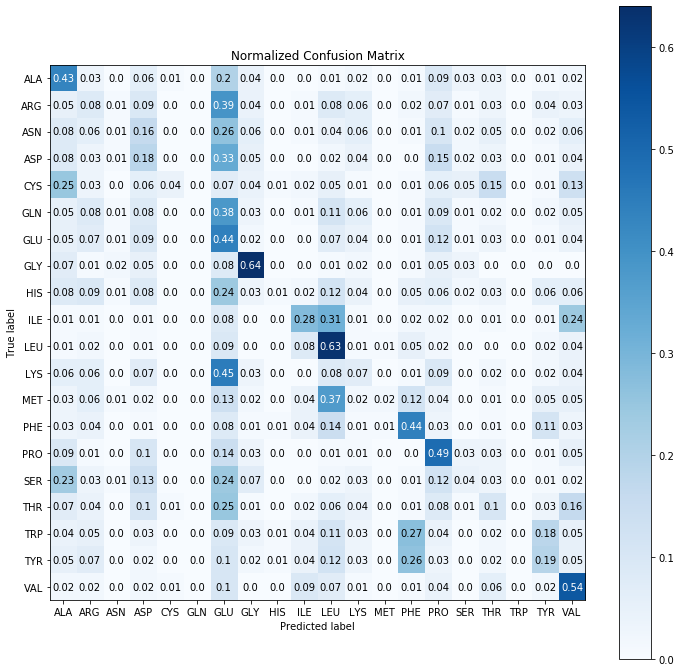

In [72]:
#Define device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

#Define pre-training data transformations
transform = transforms.Compose(
[transforms.ToTensor()])

#Load Train set for inference
print('Loading trainset...')

testset = DatasetAPPM(testset_path,transform = transform)

testloader = torch.utils.data.DataLoader(testset, batch_size=256,
                                       shuffle=False, num_workers=0)
print('Validationset loaded.')

#Load Net model
model = TheNet()
model.load_state_dict(torch.load(weights_path + 'weights.pth'))
model.to(device)

print('Neural network evaluation mode activated!!!')
model.eval()

all_labels = []
all_predictions = []

with torch.no_grad():
  for data in testloader:
      grids, labels, resIdx = data
        
      # send data to device
      grids = grids.to(device)
      labels = labels.to(device)
    
      print('Labels: ',labels)
      outputs = model(grids)
      _, prediction = torch.max(outputs, 1)

      all_labels = all_labels + labels.cpu().numpy().tolist()
      all_predictions = all_predictions + prediction.cpu().tolist()
      print(output)

#Translate id to class names
all_labels = id_to_class(all_labels)
all_predictions = id_to_class(all_predictions)

cm = confusion_matrix(all_labels, all_predictions)

ax = skplt.metrics.plot_confusion_matrix(all_labels,all_predictions,normalize=True,figsize=(12,12))
ax.set_ylim(len(cm)-0.5, -0.5) #Bug correction for matplotlib 3.1.1 version

#Save on eps format for vectorized image
plt.savefig(weights_path + 'confusion_matrix.eps')
#Save on png formart for easy visualization
plt.savefig(weights_path + 'confusion_matrix.png')